# EDA Case-Study

# Business Understanding
- The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. 
- Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. 
- This will ensure that the applicants capable of repaying the loan are not rejected

#### When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

# Business Objectives
- This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
- In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Importing the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
from scipy import stats
from scipy.stats import norm, skew #for some statistics
plt.style.use('fivethirtyeight')

import math
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
pd.set_option('display.max_columns',130)
pd.options.display.max_info_columns
plt.style.use('ggplot')

# Objective
- To Analyze the percentage of Credit Loss and Interest Loss the bank would suffer

# Dataset Link
https://drive.google.com/open?id=16RQztUqCfJOlbooHqYlJrp6Q7iL65uZB

# Dataset Description
- 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.
- 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
- 'columns_description.csv' is data dictionary which describes the meaning of the variables.

### Importing the dataset

In [2]:
app_data=pd.read_csv("application_data.csv")
prev_app=pd.read_csv("previous_application.csv")

In [3]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### exploring application data

In [4]:
app_data.shape

(307511, 122)

In [5]:
app_data.info(max_cols=123)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [6]:
app_data.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [7]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Find the missing percentage in the data

In [8]:
def missing_percentage(df):
    total=df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False)!=0]
    percent=(df.isnull().sum().sort_values(ascending=False)/len(df) *100)[(df.isnull().sum().sort_values(ascending=False)/len(df) *100)!=0]
    
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FLOORSMIN_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,YEARS_BUILD_MODE,OWN_CAR_AGE,LANDAREA_MODE,LANDAREA_AVG,LANDAREA_MEDI,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MEDI,NONLIVINGAREA_AVG,NONLIVINGAREA_MODE,ELEVATORS_MODE,ELEVATORS_AVG,ELEVATORS_MEDI,WALLSMATERIAL_MODE,APARTMENTS_MODE,APARTMENTS_AVG,APARTMENTS_MEDI,ENTRANCES_MEDI,ENTRANCES_MODE,ENTRANCES_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,LIVINGAREA_AVG,HOUSETYPE_MODE,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
Total,214865.000000,214865.000000,214865.000000,213514.000000,213514.000000,213514.000000,210295.000000,210199.000000,210199.000000,210199.000000,208642.000000,208642.000000,208642.000000,204488.000000,204488.000000,204488.000000,202929.000000,182590.000000,182590.000000,182590.000000,179943.000000,179943.000000,179943.000000,173378.000000,169682.000000,169682.000000,169682.000000,163891.000000,163891.000000,163891.000000,156341.000000,156061.000000,156061.000000,156061.000000,154828.000000,154828.000000,154828.000000,154350.000000,154350.000000,154350.000000,154297.000000,153020.000000,153020.000000,153020.000000,150007.000000,150007.000000,150007.000000,148431.000000,145755.000000,96391.000000,60965.000000,41519.000000,41519.000000,41519.000000,41519.000000,41519.000000,41519.000000,1292.000000,1021.000000,1021.000000,1021.000000,1021.000000,660.000000,278.000000,12.000000,2.000000,1.000000
Percent,69.872297,69.872297,69.872297,69.432963,69.432963,69.432963,68.386172,68.354953,68.354953,68.354953,67.848630,67.848630,67.848630,66.497784,66.497784,66.497784,65.990810,59.376738,59.376738,59.376738,58.515956,58.515956,58.515956,56.381073,55.179164,55.179164,55.179164,53.295980,53.295980,53.295980,50.840783,50.749729,50.749729,50.749729,50.348768,50.348768,50.348768,50.193326,50.193326,50.193326,50.176091,49.760822,49.760822,49.760822,48.781019,48.781019,48.781019,48.268517,47.398304,31.345545,19.825307,13.501631,13.501631,13.501631,13.501631,13.501631,13.501631,0.420148,0.332021,0.332021,0.332021,0.332021,0.214626,0.090403,0.003902,0.000650,0.000325


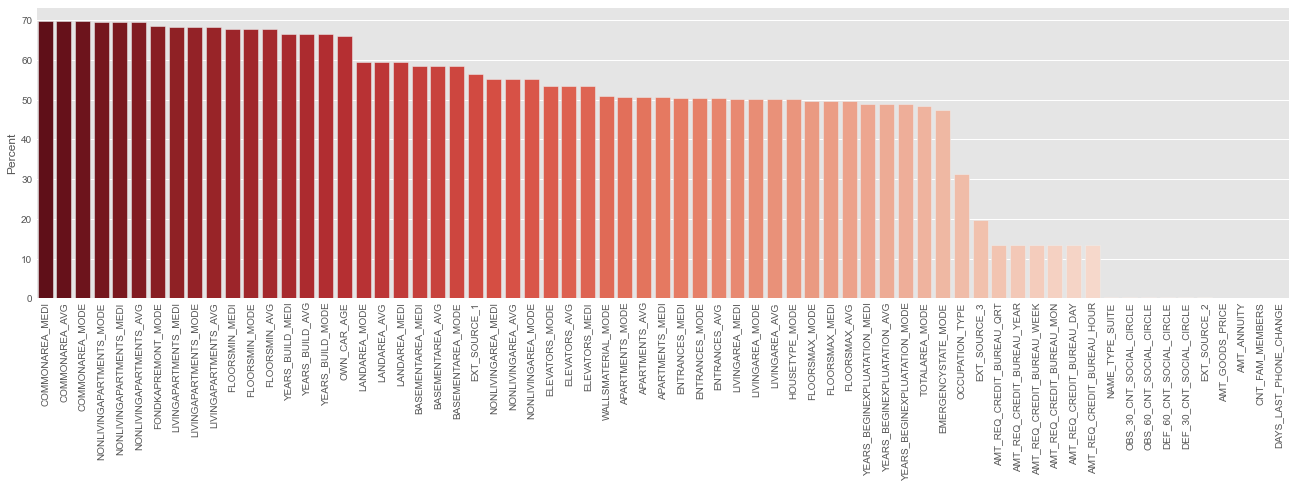

In [9]:
missing = missing_percentage(app_data)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

### Observations:
- As we can see there is more than 50% data that is lost.
- We can safely drop the columns which contribute to more data loss.

# checking for outliers

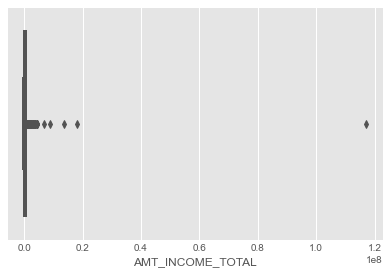

In [10]:
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.show()

outliers are present in the AMT_INCOME_TOTAL which can be deleted because there a set of few people with very high income total and this set might cause deviation in the analysis

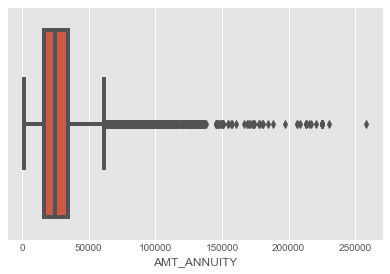

In [11]:
sns.boxplot(app_data.AMT_ANNUITY)
plt.show()


few outliers are observed in AMT_ANNUITY

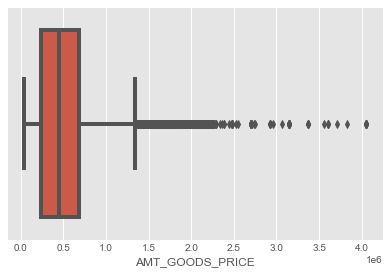

In [12]:
sns.boxplot(app_data.AMT_GOODS_PRICE)
plt.show()

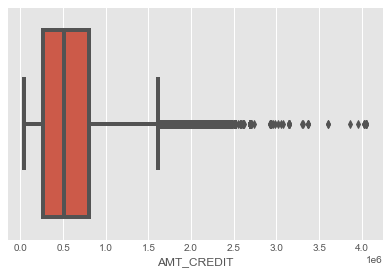

In [13]:
sns.boxplot(app_data.AMT_CREDIT)
plt.show()

depending on the amount of goods price , the credit amount is decided.As goods price amount is high we also observe the increase in AMT_CREDIT

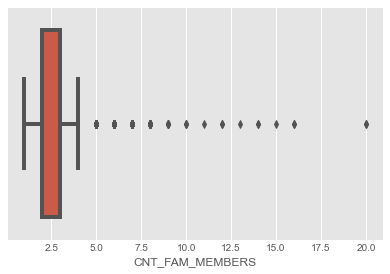

In [14]:
sns.boxplot(app_data.CNT_FAM_MEMBERS)
plt.show()

there is an outlier present in the data but it cannot be deleted because there is a chance that this high number exist

### Dropping the columns

In [15]:
app_data=app_data.drop(['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MEDI',
                        'NONLIVINGAPARTMENTS_AVG','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG',
                       'FLOORSMIN_MEDI','FLOORSMIN_MODE','FLOORSMIN_AVG','YEARS_BUILD_MEDI','YEARS_BUILD_AVG','YEARS_BUILD_MODE','OWN_CAR_AGE',
                       'LANDAREA_MODE','LANDAREA_AVG','LANDAREA_MEDI','BASEMENTAREA_MEDI','BASEMENTAREA_AVG','BASEMENTAREA_MODE','EXT_SOURCE_1',
                       'NONLIVINGAREA_MEDI','NONLIVINGAREA_AVG','NONLIVINGAREA_MODE','ELEVATORS_MODE','ELEVATORS_AVG',
                       'ELEVATORS_MEDI','WALLSMATERIAL_MODE','APARTMENTS_MODE','APARTMENTS_AVG','APARTMENTS_MEDI',
                        'ENTRANCES_MEDI','ENTRANCES_MODE','ENTRANCES_AVG','LIVINGAREA_MEDI','LIVINGAREA_MODE','LIVINGAREA_AVG',
                       'HOUSETYPE_MODE','FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG',
                       'TOTALAREA_MODE','EMERGENCYSTATE_MODE','YEARS_BEGINEXPLUATATION_MODE'],axis=1)

In [16]:
app_data.shape

(307511, 73)

,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
Total,96391.000000,60965.000000,41519.000000,41519.000000,41519.000000,41519.000000,41519.000000,41519.000000,1292.000000,1021.000000,1021.000000,1021.000000,1021.000000,660.000000,278.000000,12.000000,2.000000,1.000000
Percent,31.345545,19.825307,13.501631,13.501631,13.501631,13.501631,13.501631,13.501631,0.420148,0.332021,0.332021,0.332021,0.332021,0.214626,0.090403,0.003902,0.000650,0.000325


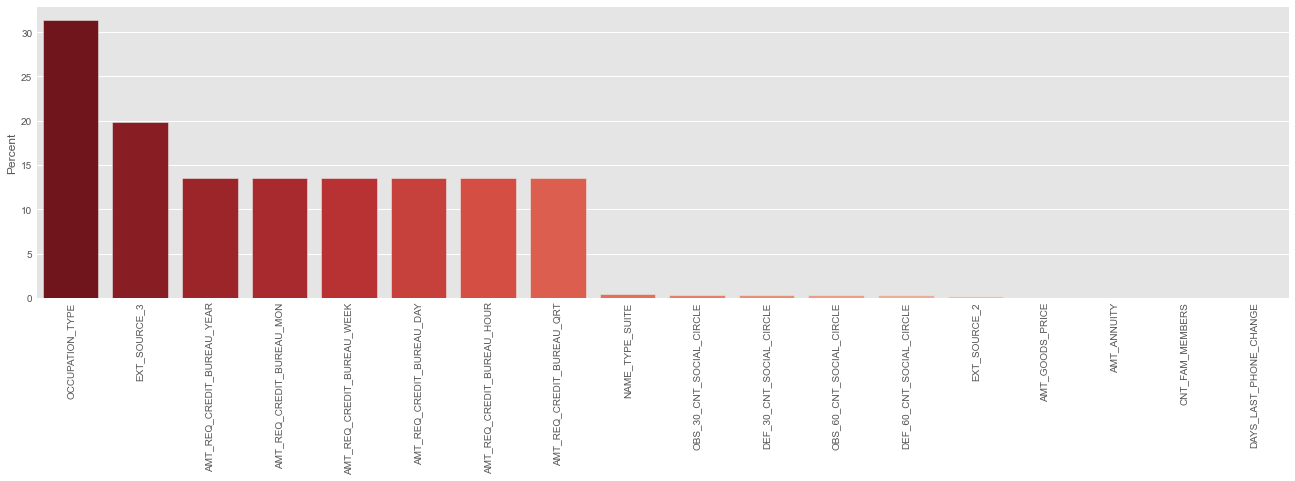

In [17]:
missing = missing_percentage(app_data)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

### observations
- Here we are dropping columns which are having more than 30% data loss.

## Dividing the dataset
- Here we are dividing the dataset into two i.e., null_data and not_null_data

In [18]:
null_data=app_data[list(app_data.columns[app_data.isnull().any()])].copy()

In [19]:
null_data['target']=app_data['TARGET']

In [20]:
null_data

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,target
0,24700.5,351000.0,Unaccompanied,Laborers,1.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,35698.5,1129500.0,Family,Core staff,2.0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6750.0,135000.0,Unaccompanied,Laborers,1.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,29686.5,297000.0,Unaccompanied,Laborers,2.0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,21865.5,513000.0,Unaccompanied,Core staff,1.0,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,225000.0,Unaccompanied,Sales staff,1.0,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,0
307507,12001.5,225000.0,Unaccompanied,NaN,1.0,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
307508,29979.0,585000.0,Unaccompanied,Managers,1.0,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,0
307509,20205.0,319500.0,Unaccompanied,Laborers,2.0,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [21]:
null_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_ANNUITY                 307499 non-null  float64
 1   AMT_GOODS_PRICE             307233 non-null  float64
 2   NAME_TYPE_SUITE             306219 non-null  object 
 3   OCCUPATION_TYPE             211120 non-null  object 
 4   CNT_FAM_MEMBERS             307509 non-null  float64
 5   EXT_SOURCE_2                306851 non-null  float64
 6   EXT_SOURCE_3                246546 non-null  float64
 7   OBS_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 8   DEF_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 9   OBS_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 10  DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 11  DAYS_LAST_PHONE_CHANGE      307510 non-null  float64
 12  AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 13  AMT_REQ_CREDIT

In [22]:
null_data.nunique().sort_values()

target                             2
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_TYPE_SUITE                    7
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
DEF_60_CNT_SOCIAL_CIRCLE           9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_YEAR        25
OBS_60_CNT_SOCIAL_CIRCLE          33
OBS_30_CNT_SOCIAL_CIRCLE          33
EXT_SOURCE_3                     814
AMT_GOODS_PRICE                 1002
DAYS_LAST_PHONE_CHANGE          3773
AMT_ANNUITY                    13672
EXT_SOURCE_2                  119831
dtype: int64

In [23]:
null_data.DAYS_LAST_PHONE_CHANGE=null_data.DAYS_LAST_PHONE_CHANGE.abs()

### observation
- The column DAYS_LAST_PHONE_CHANGE in the application dataset contains negative values, since days cannot be in negative, the values in the column should be changed to positive

## Correlation plot

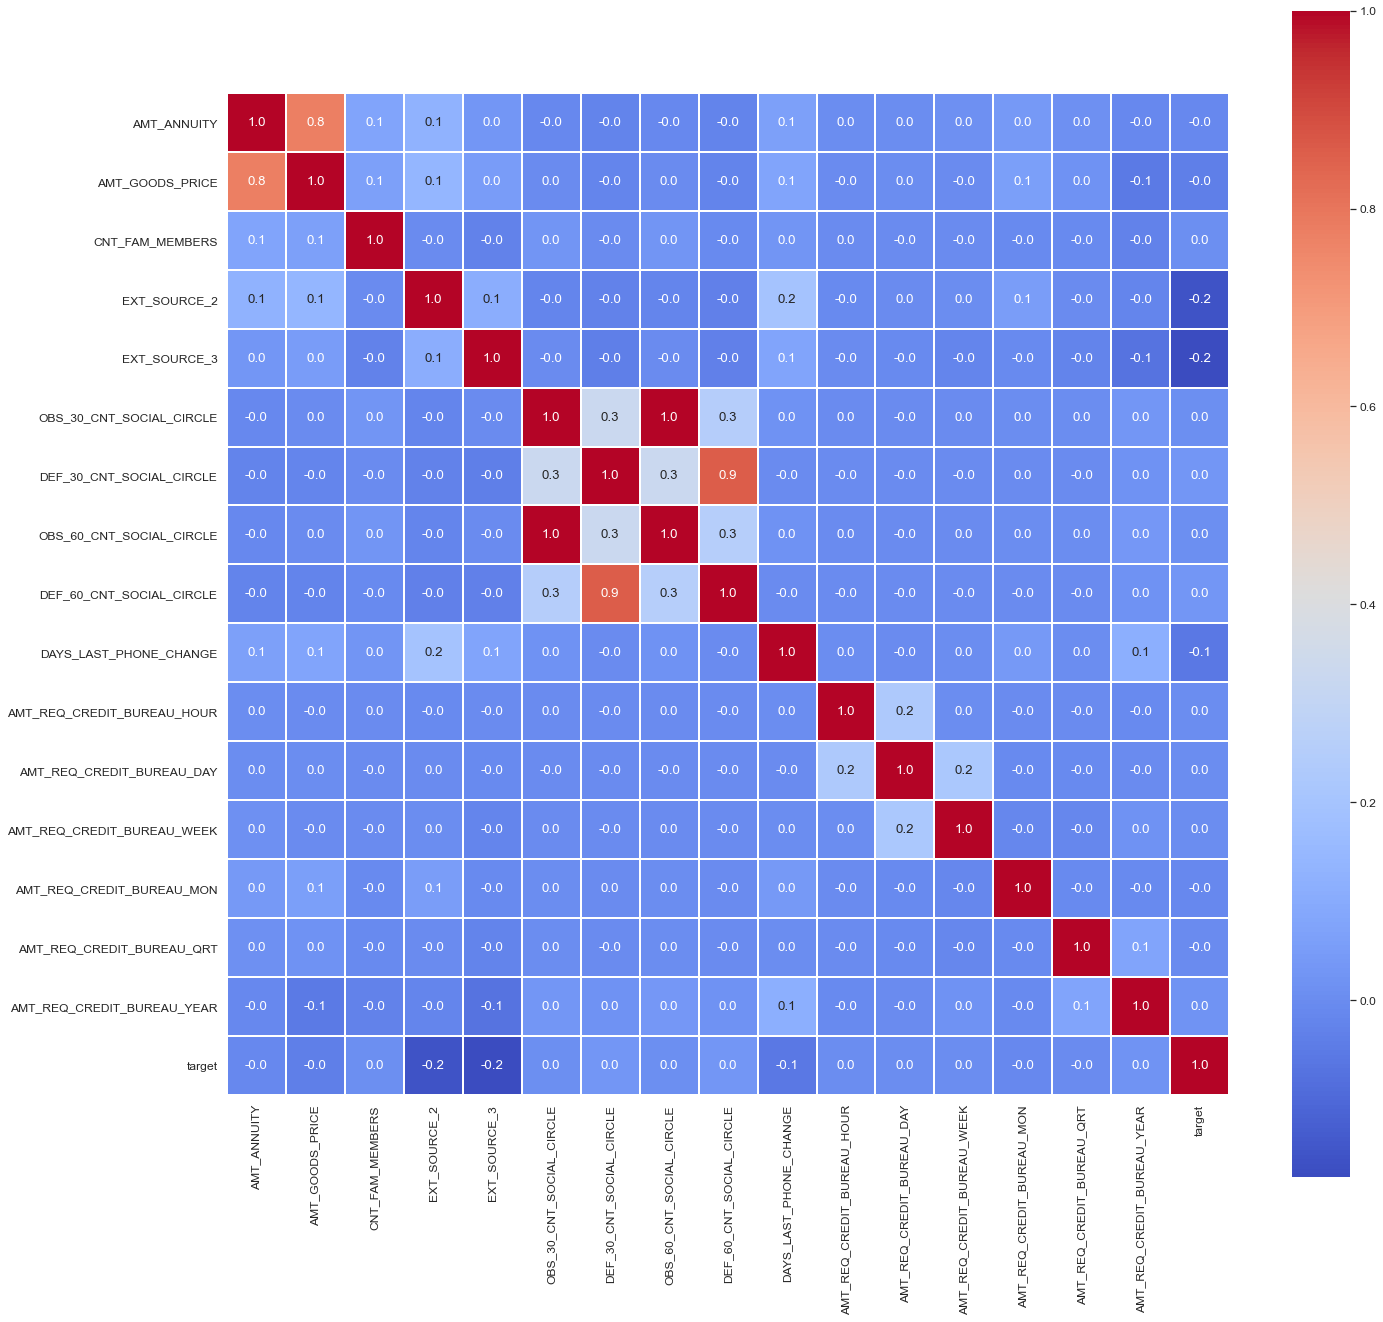

In [24]:
sns.set(font_scale=1.1)
correlation_train = null_data.corr()
#mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,annot=True,fmt='.1f',cmap='coolwarm',square=True,linewidths=1)

plt.show()

# Missing values imputation
- CNT_FAM_MEMBERS can be replaced with mean
- NAME_TYPE_SUITE can be replaced with mode
- AMT_REQ_CREDIT_BUREAU_HOUR can be replaced with zero
- AMT_REQ_CREDIT_BUREAU_DAY  can be replaced with zero
- AMT_REQ_CREDIT_BUREAU_WEEK can be replaced with zero

In [25]:
not_null_data=app_data[list(app_data.columns[~app_data.isnull().any()])].copy()

In [26]:
not_null_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,3,3,THURSDAY,9,0,0,0,0,1,1,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
not_null_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [28]:
not_null_data.nunique().sort_values()

FLAG_DOCUMENT_21                    2
FLAG_EMAIL                          2
FLAG_DOCUMENT_20                    2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_10                    2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMP_PHONE                      2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
FLAG_DOCUMEN

### changing the datatypes

In [29]:

app_data.DAYS_BIRTH=app_data['DAYS_BIRTH'].abs()
app_data.DAYS_REGISTRATION=app_data['DAYS_REGISTRATION'].abs()
app_data.DAYS_REGISTRATION=app_data['DAYS_REGISTRATION'].abs()
app_data.DAYS_EMPLOYED=app_data['DAYS_EMPLOYED'].abs()
app_data.DAYS_ID_PUBLISH=app_data['DAYS_ID_PUBLISH'].abs()
app_data.DAYS_LAST_PHONE_CHANGE=app_data.DAYS_LAST_PHONE_CHANGE.abs()
app_data.AMT_CREDIT = app_data.AMT_CREDIT.astype('int')

### observation
- After checking all the columns in the application dataset, few columns needed datatype changes.
- All the columns that contain information regarding days have been changed to positive integers.
- AMT_CREDIT column is changed to int datatype from float.

# Binning the variables

### AMT_INCOME_TOTAL
- AMT_INCOME_TOTAL in the application dataset gives information about the client's income.
- Since each client's income vary we can bin the variables as follows,
-  Client's whose income is in range [100-1000] as low
-  Client's whose income is in range [1000-10000] as below_avg
-  Client's whose income is in range [10000-100000] as avg
-  Client's whose income is in range [100000-1000000] as above_avg
-  Client's whose income is in range [1000000-120000000] as high

In [30]:
app_data.AMT_INCOME_TOTAL=pd.cut(app_data['AMT_INCOME_TOTAL'],[100,10000,100000,1000000,10000000,120000000],
                                 labels=['low','below_avg','avg','above_avg','high'])


## CNT_CHILDREN

- CNT_CHILDREN in the application dataset gives information about no of children a client have
- we categorized it into two parts.
- Thoses with atmost two children and those with more than two children

In [31]:
app_data['CNT_CHILDREN']=app_data['CNT_CHILDREN'].apply(lambda x: 'atmost_two_children' if x<=2 else 'more_than_two_children')

In [32]:
app_data.CNT_CHILDREN.value_counts()

atmost_two_children       303239
more_than_two_children      4272
Name: CNT_CHILDREN, dtype: int64

# Data imbalance

In [33]:
df_1=app_data[app_data['TARGET']==1]
df_0=app_data[app_data['TARGET']==0]

In [34]:
percentage_defaulters=(len(df_1)*100)/len(app_data)
percentage_nondefaulters=(len(df_0)*100)/len(app_data)

print("The Percentage of people who have paid their loan is:",round(percentage_nondefaulters,2),"%")
print("The Percentage of people who have NOT paid their loan is:",round(percentage_defaulters,2),"%")
print("The Ratio of Data Imbalance is:",round(len(df_0)/len(df_1),2))

The Percentage of people who have paid their loan is: 91.93 %
The Percentage of people who have NOT paid their loan is: 8.07 %
The Ratio of Data Imbalance is: 11.39


# Correlation plot for defaulters

In [35]:
corr1=df_1.corr()
corr1=corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))
corr1_df=corr1.unstack().reset_index()
corr1_df.columns=['Var1','Var2','Correlation']
corr1_df.dropna(subset=['Correlation'],inplace=True)
corr1_df['Correlation_abs']=corr1_df['Correlation'].abs()
corr1_df.sort_values("Correlation_abs",ascending=False,inplace=True)
corr1_df.head(5).style.background_gradient(
    cmap='summer_r')


,Var1,Var2,Correlation,Correlation_abs
656,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999705,0.999705
1798,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269,0.998269
238,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
1079,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637,0.956637
1858,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994,0.868994


### observation
- Here we finding the correlation for top 5 variables

# Correlation plot for non defaulters

In [36]:
corr0=df_0.corr()
corr0=corr0.where(np.triu(np.ones(corr0.shape),k=1).astype(np.bool))
corr0_df=corr0.unstack().reset_index()
corr0_df.columns=['Var1','Var2','Correlation']
corr0_df.dropna(subset=['Correlation'],inplace=True)
corr0_df['Correlation_abs']=corr0_df['Correlation'].abs()
corr0_df.sort_values("Correlation_abs",ascending=False,inplace=True)
corr0_df.head(5).style.background_gradient(
    cmap='summer_r')

,Var1,Var2,Correlation,Correlation_abs
656,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999756,0.999756
1798,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508,0.998508
238,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
1079,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149,0.950149
1319,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861,0.861861


### observation
- Here we finding the correlation for top 5 variables

# Univariate Analysis

### lets start by plotting category variables and their frequencies

In [37]:
# category variables in application dataset
cats = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START']

In [38]:
def plotFrequency(cats):
    '''A plot for visualize categorical data, showing both absolute and relative frequencies'''
    
    fig, axes = plt.subplots(math.ceil(len(cats) / 3), 3, figsize=(40,40))
    axes = axes.flatten()

    for ax, cat in zip(axes, cats):
        if cat == 'TARGET':
            total = float(len(app_data[cat]))
        else:
            total = float(len(app_data[cat]))
        sns.countplot(app_data[cat], palette='plasma', ax=ax)

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 10,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha="center")

        plt.ylabel('Count', fontsize=15, weight='bold')

posx and posy should be finite values
posx and posy should be finite values


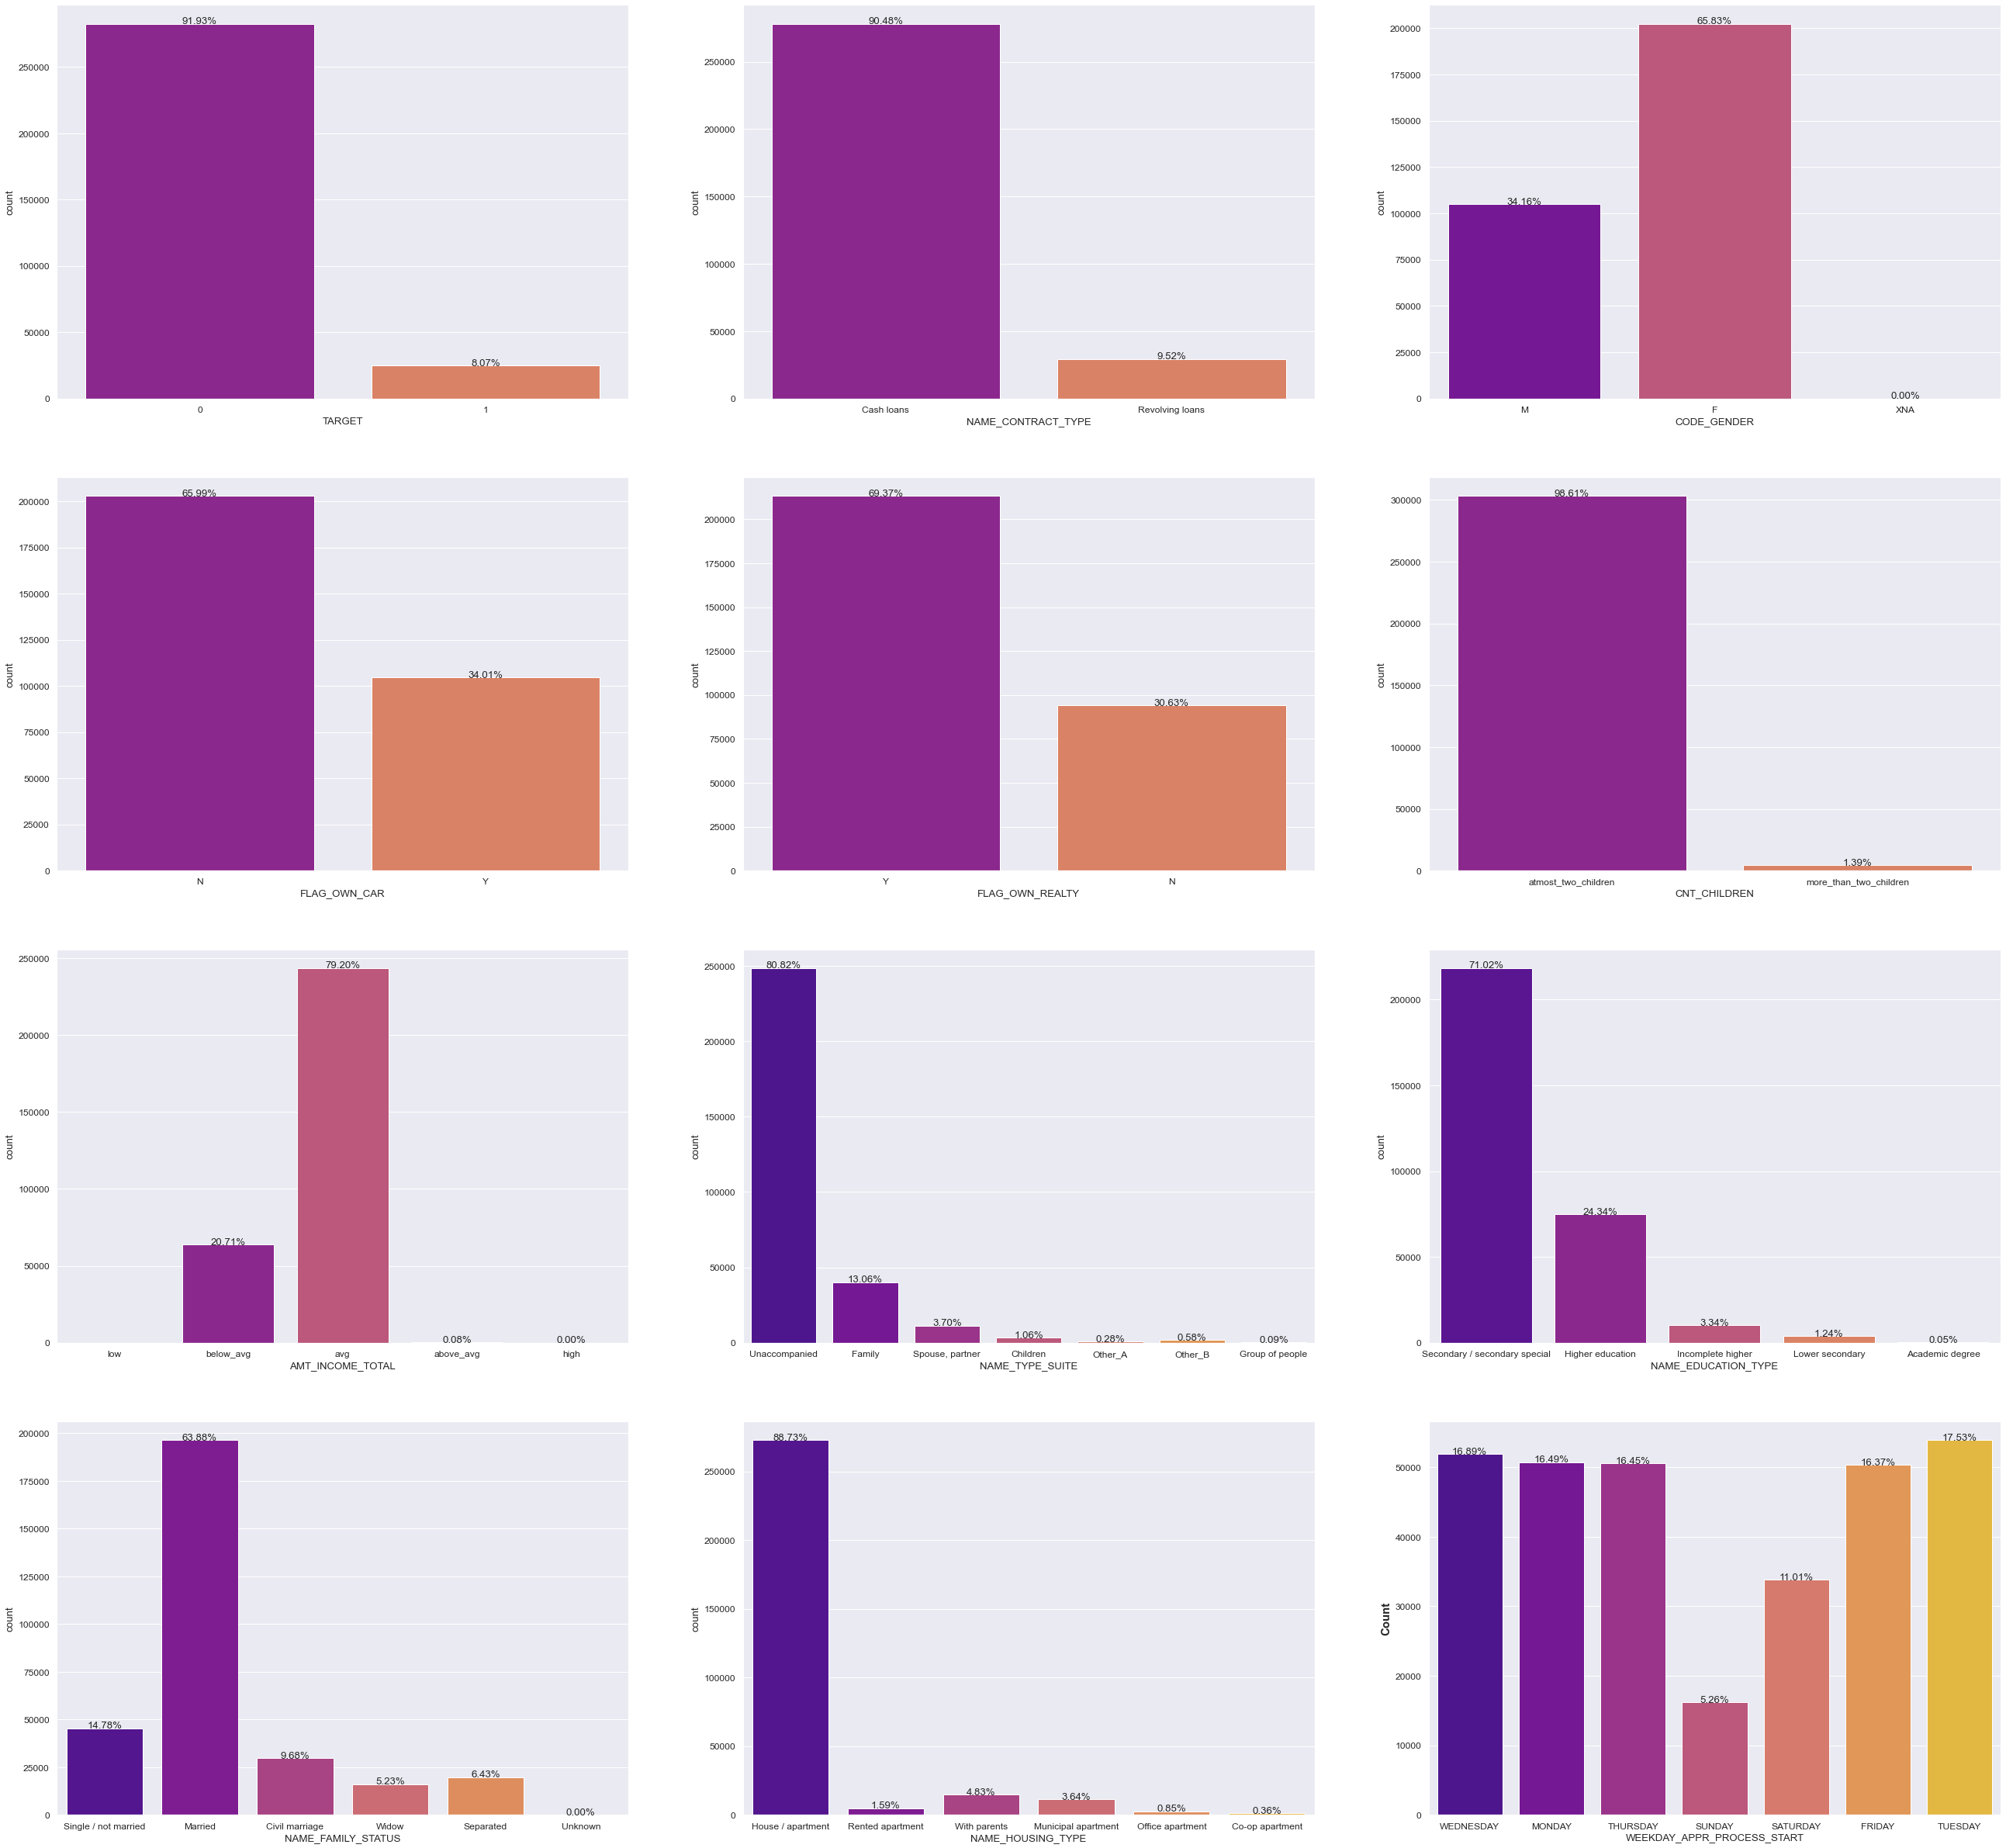

In [39]:
plotFrequency(cats)

### observations
- we observe that the cash loans are of 90.48% and revolving loans are of 9.52%
- female clients are more in number than males clients.
- more than 60% of the clients don't own a car.
- more than 60% of the clients own a house or a flat.
- 90% of the clients have atmost 2 children
- 70% of the clients who have applied for a loan have an averag range of annual income i.e.,[100000-1000000] INR
- 80% of the clients were unaccompanied when applying for a loan.
- About 70% of the clients who have applied for the loan have atleast a secondary education.
- more than 60% of the clients who have applied for loan were married and widows were of lower percent.
- most of the clients have applied for loans on working days [mon-fri] with sunday being least

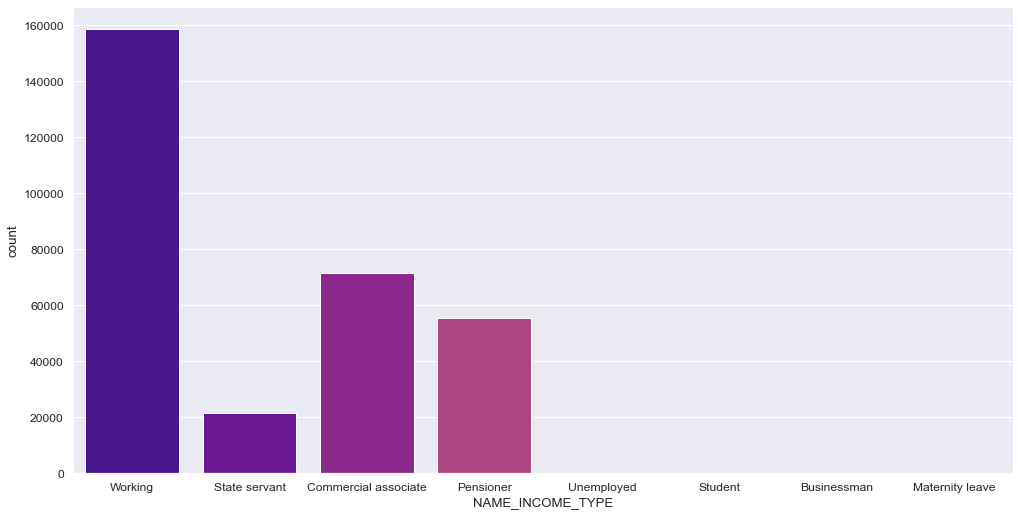

In [40]:
plt.figure(figsize=(15,8))
sns.countplot(app_data['NAME_INCOME_TYPE'],palette='plasma')
plt.show()

### observation
- most of the clients who have applied the loan are from working class

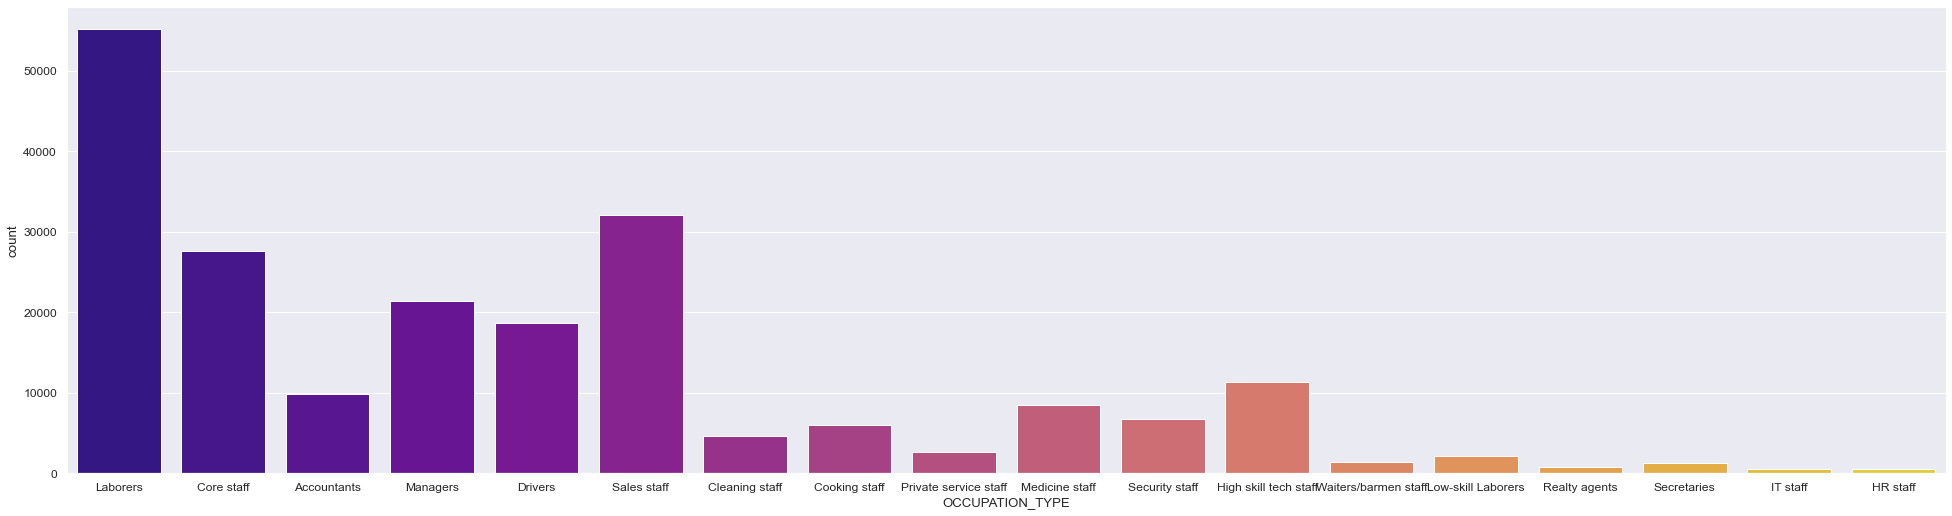

In [41]:
plt.figure(figsize=(30,8))
sns.countplot(app_data['OCCUPATION_TYPE'],palette='plasma')
plt.show()

### observation
- most of the clients who have applied the loan have an occupation type of laborers

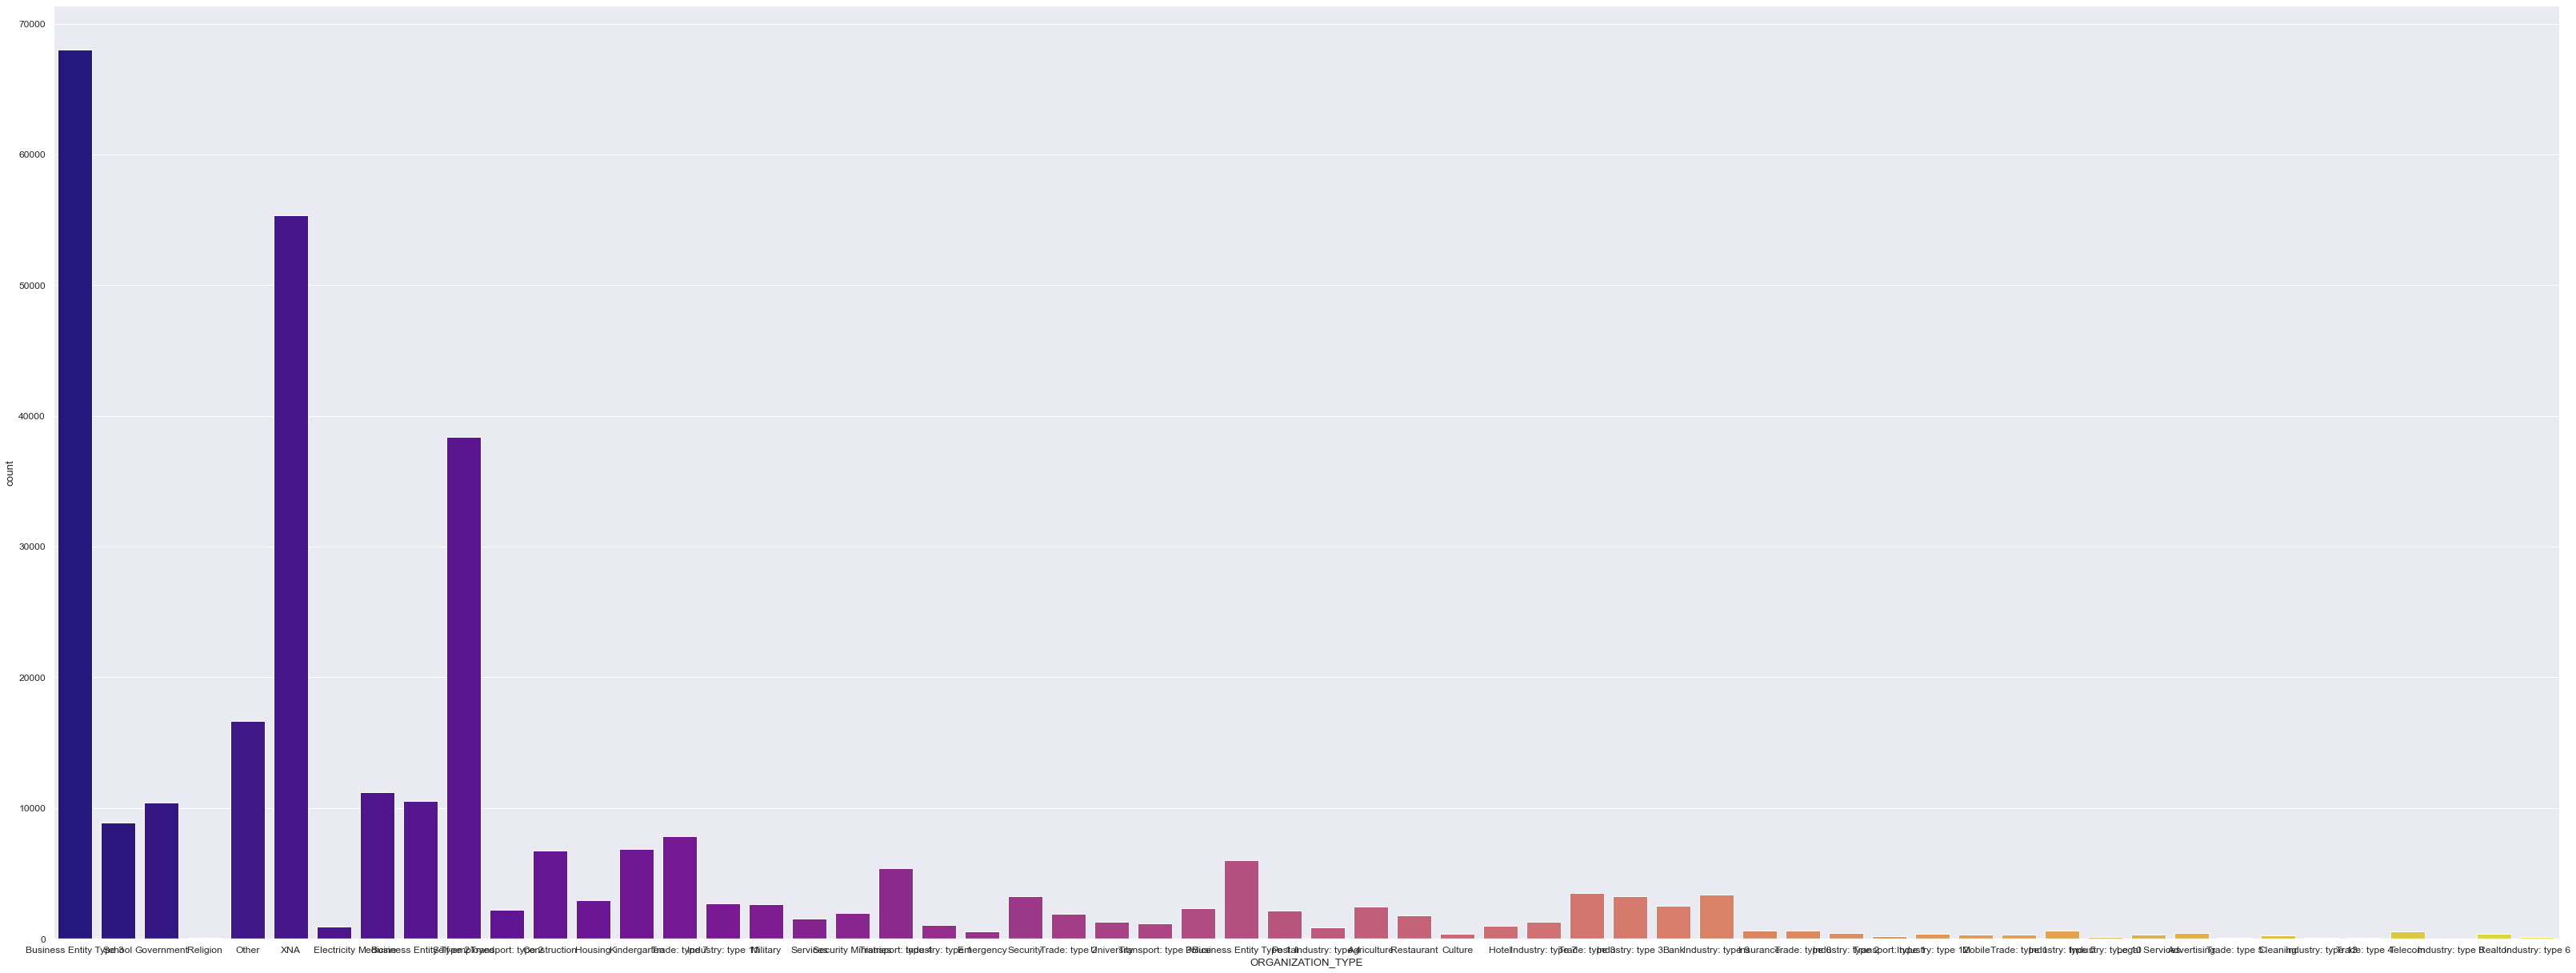

In [42]:
plt.figure(figsize=(50,20))
sns.countplot(app_data['ORGANIZATION_TYPE'],palette='plasma')
plt.show()

### observation
- most of the clients who have applied the loan are from the organization type business entity

## Let us analyse the data with respect to the TARGET variable

In [43]:
def plottarget(cats, data):
    
    fig, axes = plt.subplots(math.ceil(len(cats) / 3), 3, figsize=(30,30))
    axes = axes.flatten()

    for ax, cat in zip(axes, cats):
        if cat == 'TARGET':
            sns.countplot(app_data[cat], palette='plasma', ax=ax)

        else:

            sns.countplot(x=cat,
                          data=app_data,
                          hue='TARGET',
                          palette='plasma',
                          ax=ax)
            ax.legend(title='TARGET',
                      loc='upper right',
                      labels=['0', '1'])

        plt.ylabel('Count', fontsize=15, weight='bold')

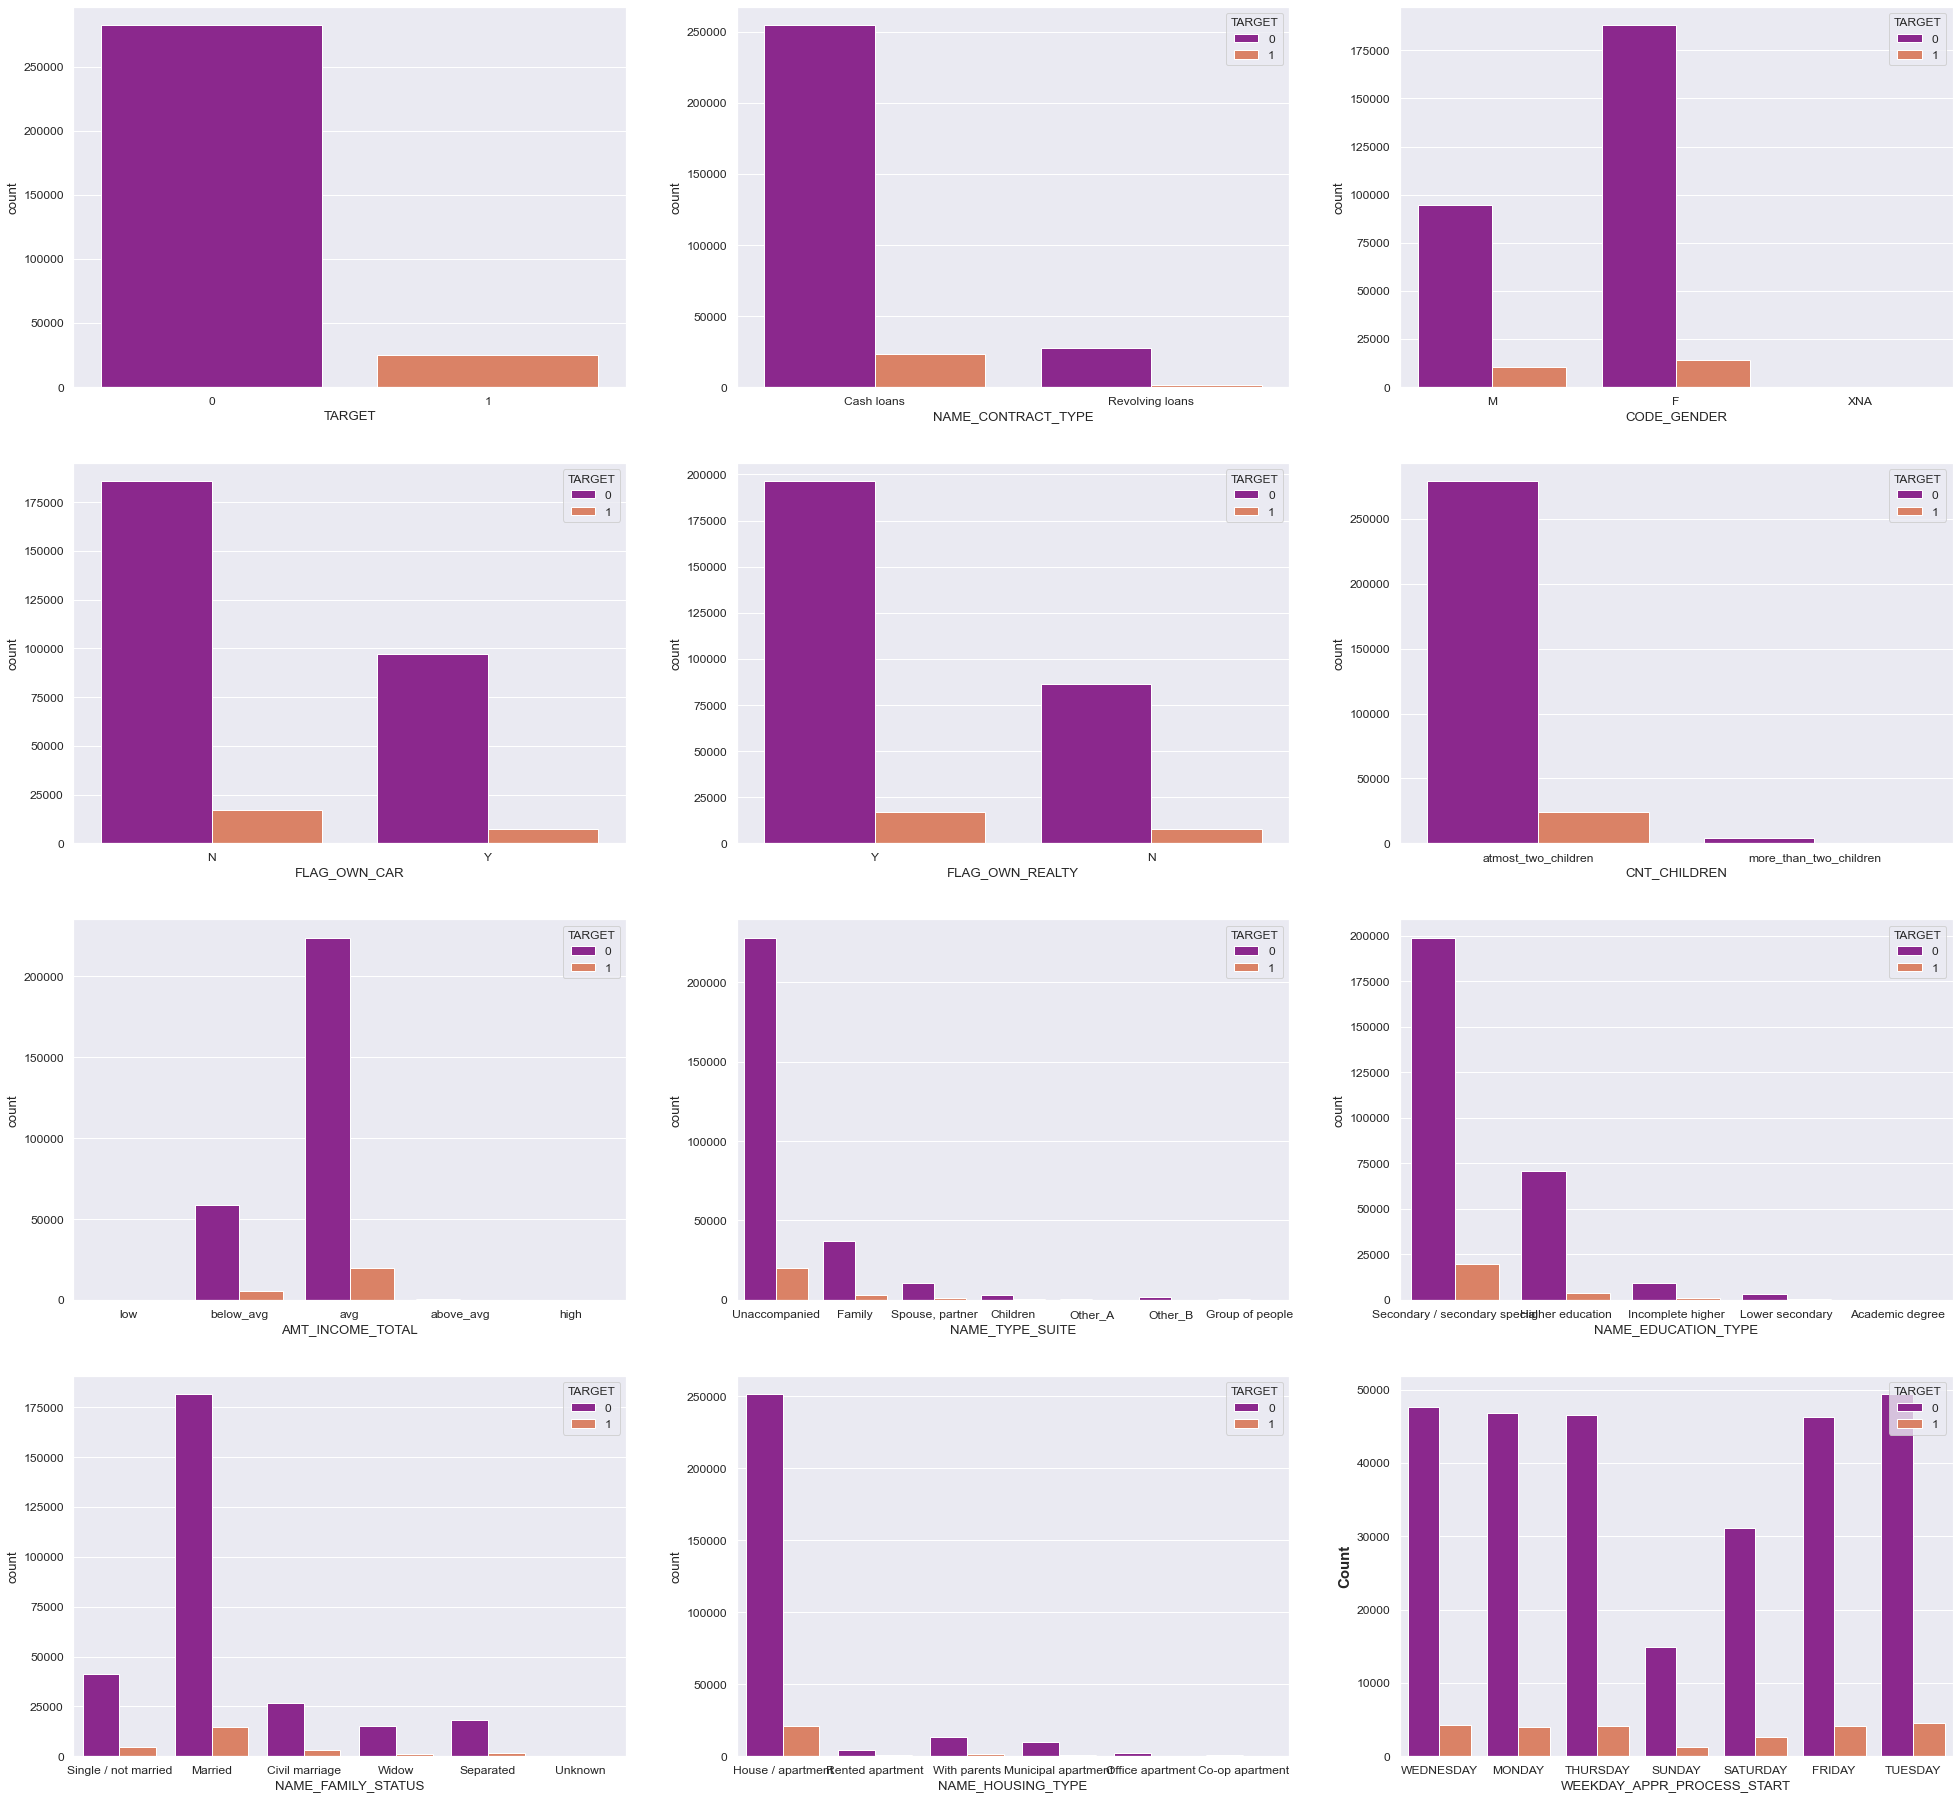

In [44]:
plottarget(cats,app_data)

### observation
- Majority of the approved loans were cash loans rather than revolving loans.
- Majority of the cash loan clients are non defaulters
- We observe that the number of Females taking loans is much higher than the number of Males for both Target = 0 and Target = 1
- We observe that the number of most people applying for loan do not own a car.
- We also observe that the ratio of people who own a car is higher for non-defaulters
- Most people live in a House/Apartment
- Ratio of People who live With Parents is more for defaulter than non-defaulters. It tells us that applicant who live with parents have a higher chance of having payment difficulties.
- there are more married clients and most of them pay back their loans
- majority of the clients who have applied for loan have an average income and pay back their loans 

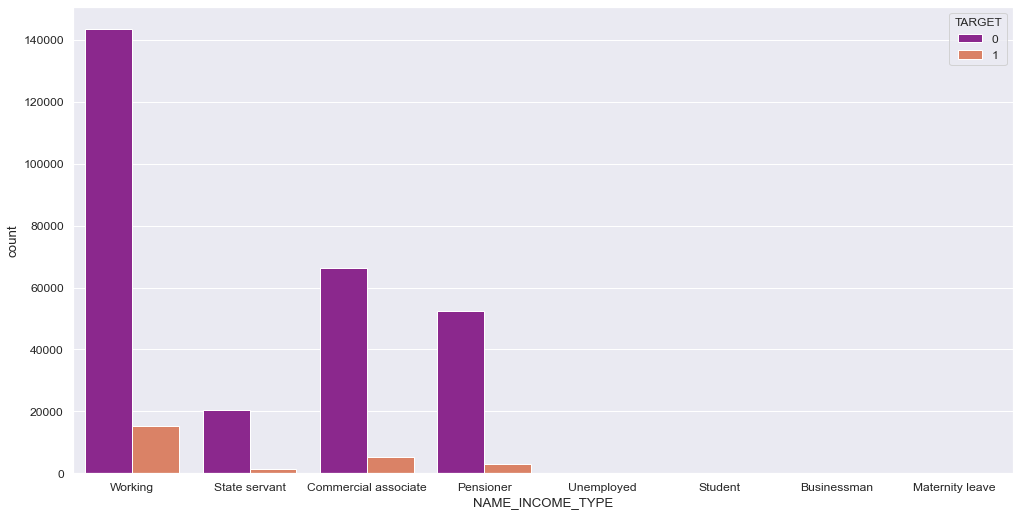

In [45]:
plt.figure(figsize=(15,8))
sns.countplot(x='NAME_INCOME_TYPE',data=app_data,palette='plasma',hue='TARGET')
plt.show()

## Observation
- we see that majority of working class are non defaulters

Text(0.5, 1.0, 'TARGET = 0')

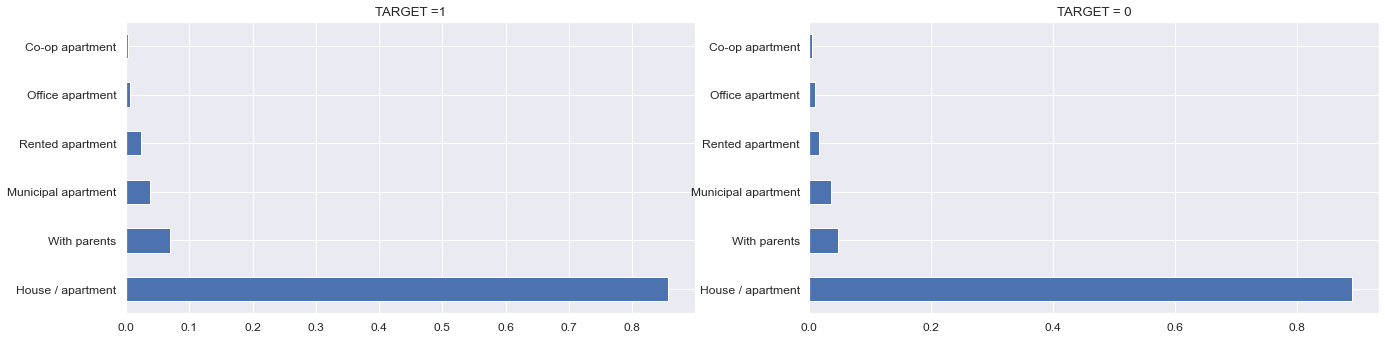

In [49]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
df_1.NAME_HOUSING_TYPE.value_counts(normalize= True).plot.barh()
plt.title('TARGET =1')

plt.subplot(1,2,2)
df_0.NAME_HOUSING_TYPE.value_counts(normalize= True).plot.barh()
plt.title('TARGET = 0')

## observation
there is no much difference in the housing type between target 1 and target 0

Text(0.5, 1.0, 'TARGET = 0')

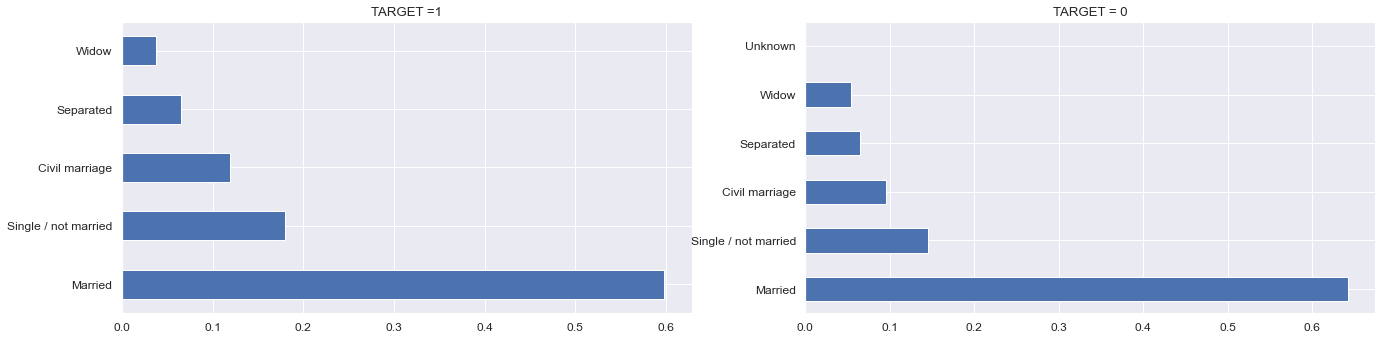

In [50]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
df_1.NAME_FAMILY_STATUS.value_counts(normalize= True).plot.barh()
plt.title('TARGET =1')

plt.subplot(1,2,2)
df_0.NAME_FAMILY_STATUS.value_counts(normalize= True).plot.barh()
plt.title('TARGET = 0')

## observations
- percentage of married people in target 0 is higher than 1
- single/not married percentage is higher in target 1 than target 0

Text(0.5, 1.0, 'TARGET = 0')

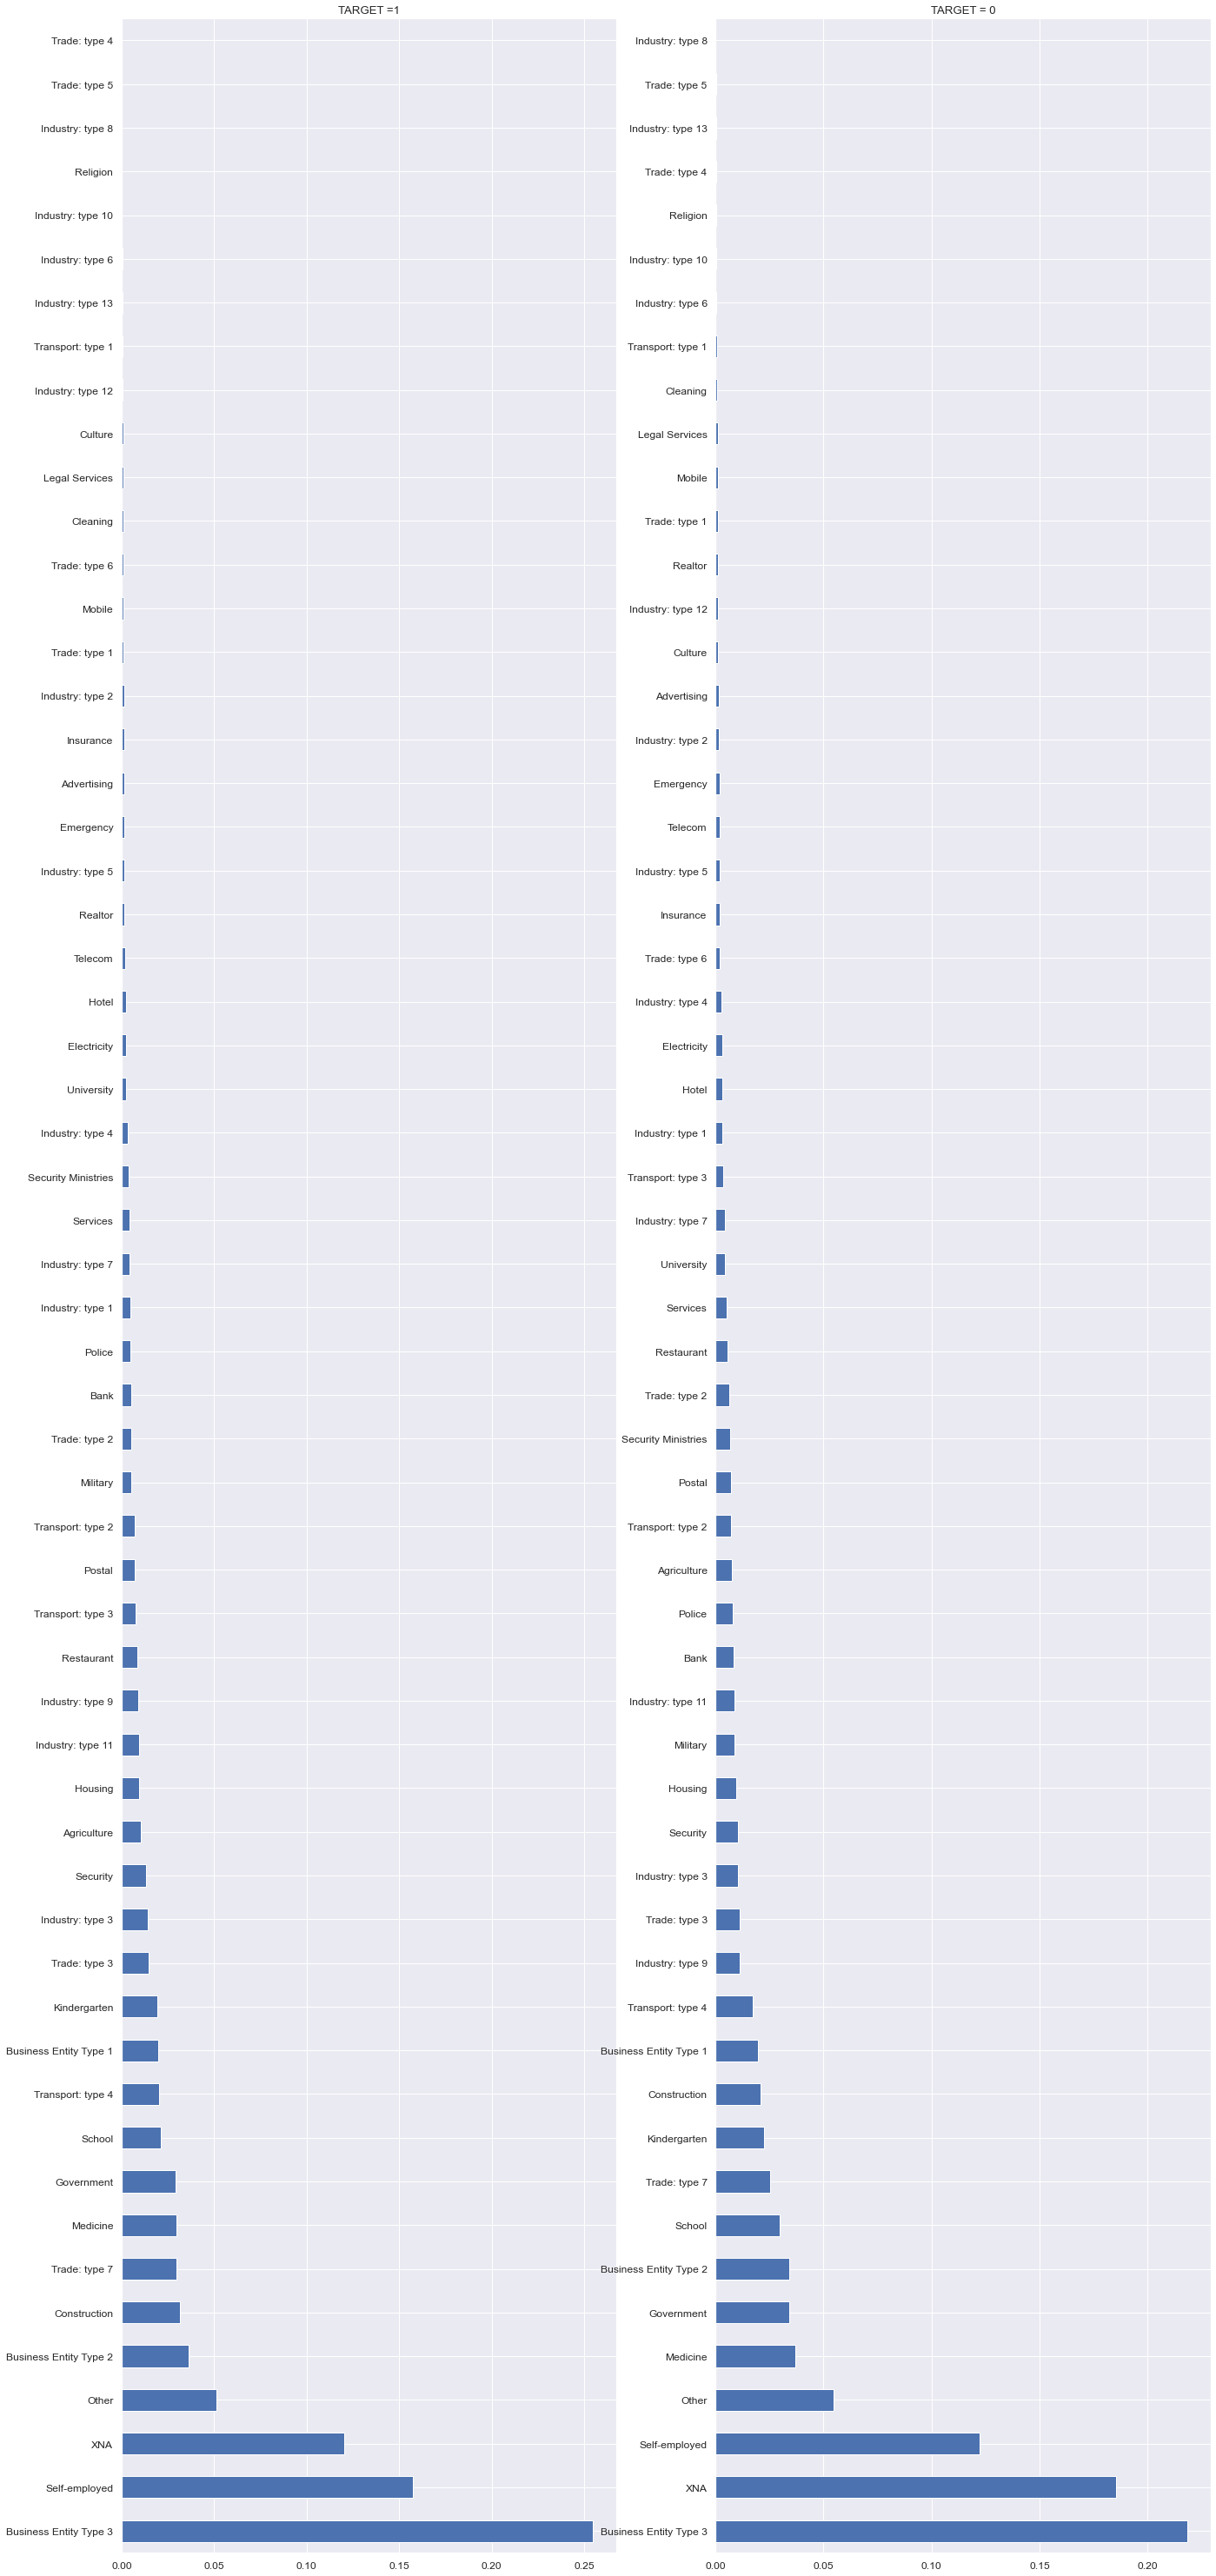

In [51]:
plt.figure(figsize=(20,50))

plt.subplot(1,2,1)
df_1.ORGANIZATION_TYPE.value_counts(normalize= True).plot.barh()
plt.title('TARGET =1')

plt.subplot(1,2,2)
df_0.ORGANIZATION_TYPE.value_counts(normalize= True).plot.barh()
plt.title('TARGET = 0')

## observations
- in target 1 percentage of buisness entity type 3 is slightly higher compared to target 0
- percentage of government sector,medical, self employed,electicity,police ,housing,is more in target 0 than target 1
-some fields such as construction percentage is slightly higher in target 1 than target 0

# Bivariate analysis

Text(0.5, 1.0, 'TARGET = 0')

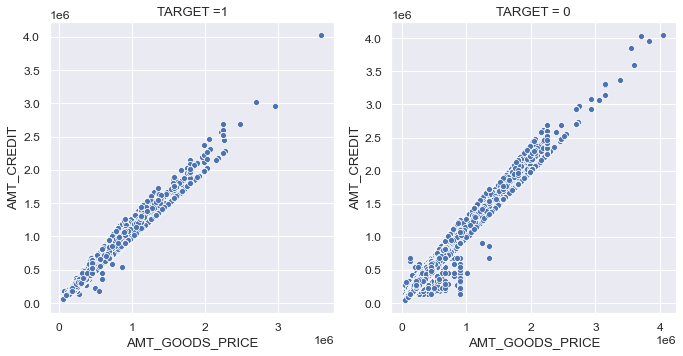

In [52]:
# continous-continous
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',data=df_1)
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',data=df_0)
plt.title('TARGET = 0')

## observations
-AMT_CREDIT is directly proportional to AMT_GOODS_PRICE

-We observe that in target0 the values are of little higher range compared to target 1

Text(0.5, 1.0, 'TARGET = 0')

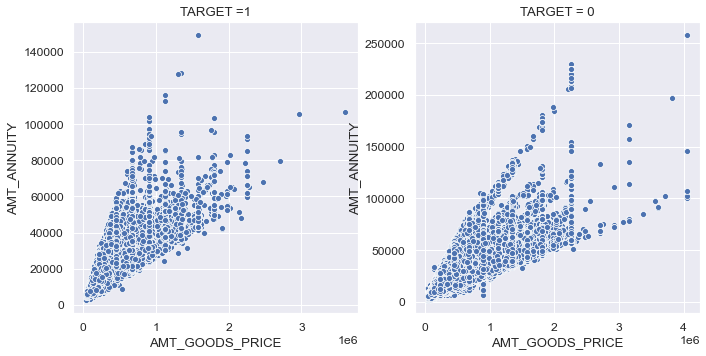

In [53]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_ANNUITY',data=df_1)
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_ANNUITY',data=df_0)
plt.title('TARGET = 0')

## observation
- presence of high AMT_ANNUITY in target1 than target 0 in comparision to AMT_GOODS_PRICE at lower levels is present

Text(0.5, 1.0, 'TARGET = 0')

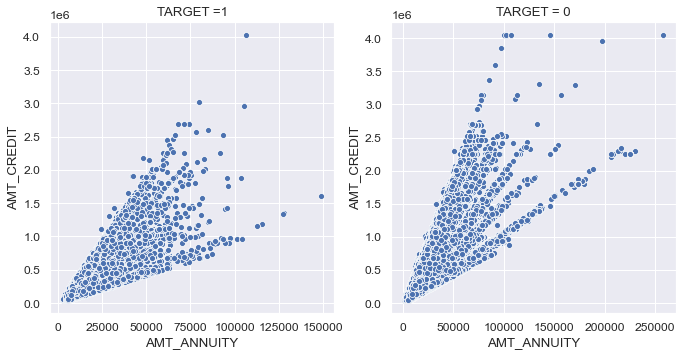

In [54]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_ANNUITY',y='AMT_CREDIT',data=df_1)
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_ANNUITY',y='AMT_CREDIT',data=df_0)
plt.title('TARGET = 0')

## observation
- high ranges of AMT_CREDIT is not observed in target 1 whereas in target0 high ranges are observed 

Text(0.5, 1.0, 'TARGET = 0')

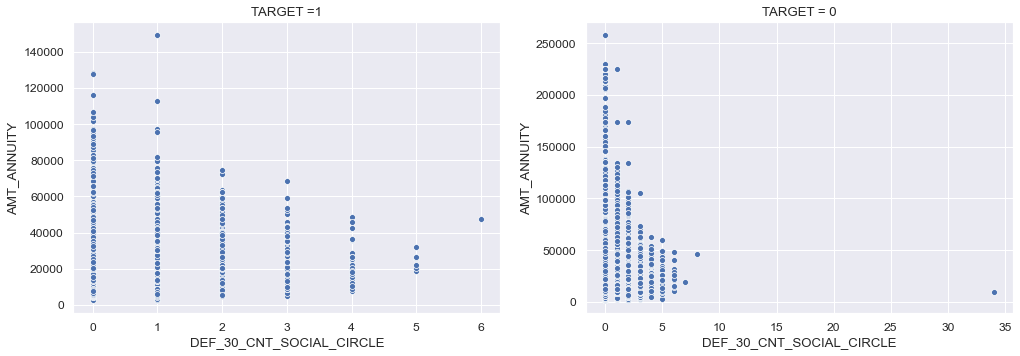

In [55]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x='DEF_30_CNT_SOCIAL_CIRCLE',y='AMT_ANNUITY',data=df_1)
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.scatterplot(x='DEF_30_CNT_SOCIAL_CIRCLE',y='AMT_ANNUITY',data=df_0)
plt.title('TARGET = 0')

### observation
- DEF_30_CNT_SOCIAL_CIRCLE of non defaulters looks less scattered than defaulters

Text(0.5, 1.0, 'TARGET = 0')

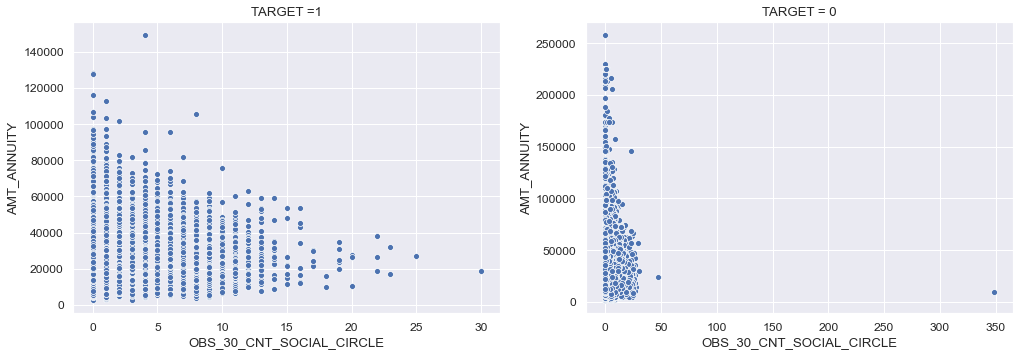

In [56]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x='OBS_30_CNT_SOCIAL_CIRCLE',y='AMT_ANNUITY',data=df_1)
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.scatterplot(x='OBS_30_CNT_SOCIAL_CIRCLE',y='AMT_ANNUITY',data=df_0)
plt.title('TARGET = 0')

### observation 
- OBS_30_CNT_SOCIAL_CIRCLE of non defaulters looks less scattered than defaulters

Text(0.5, 1.0, 'TARGET = 0')

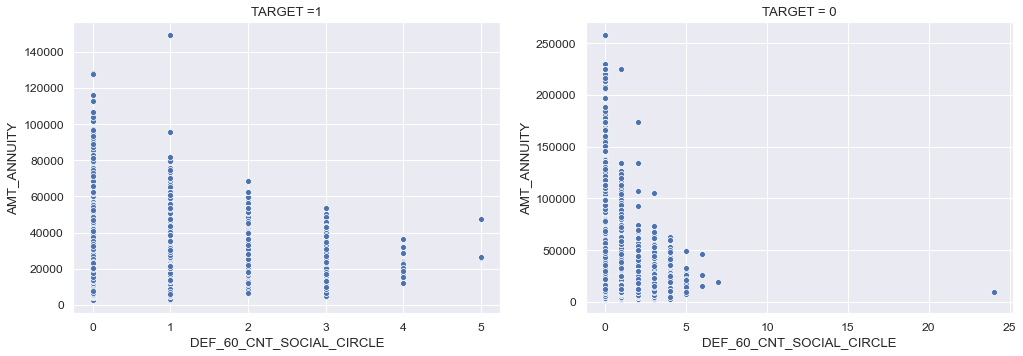

In [57]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x='DEF_60_CNT_SOCIAL_CIRCLE',y='AMT_ANNUITY',data=df_1)
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.scatterplot(x='DEF_60_CNT_SOCIAL_CIRCLE',y='AMT_ANNUITY',data=df_0)
plt.title('TARGET = 0')

### observation 
- DEF_60_CNT_SOCIAL_CIRCLE of non defaulters looks less scattered than defaulters

Text(0.5, 1.0, 'TARGET = 0')

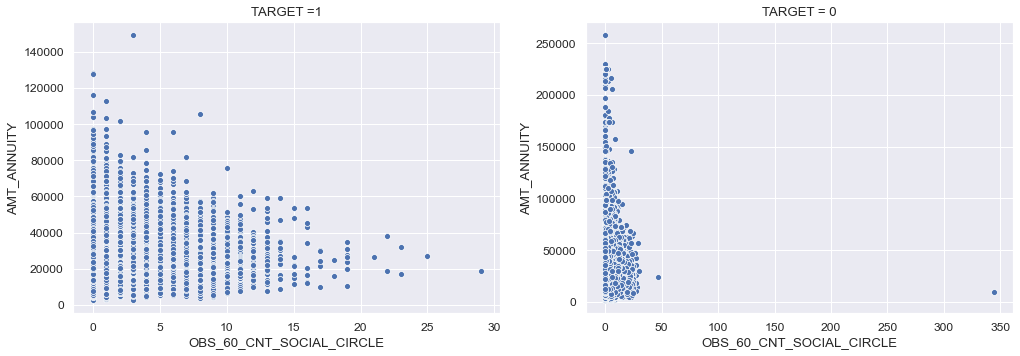

In [58]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x='OBS_60_CNT_SOCIAL_CIRCLE',y='AMT_ANNUITY',data=df_1)
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.scatterplot(x='OBS_60_CNT_SOCIAL_CIRCLE',y='AMT_ANNUITY',data=df_0)
plt.title('TARGET = 0')

### observation
- OBS_30_CNT_SOCIAL_CIRCLE of non defaulters looks less scattered than defaulters

Text(0.5, 1.0, 'TARGET = 0')

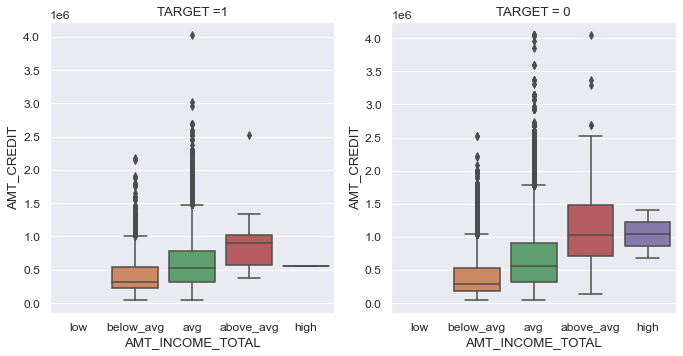

In [59]:
#continuos-categorical
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(df_1['AMT_INCOME_TOTAL'],df_1['AMT_CREDIT'])
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.boxplot(df_0['AMT_INCOME_TOTAL'],df_0['AMT_CREDIT'])
plt.title('TARGET = 0')

## observation
we observe outliers in target1 whereas there is continuity of values in target 0

Text(0.5, 1.0, 'TARGET = 0')

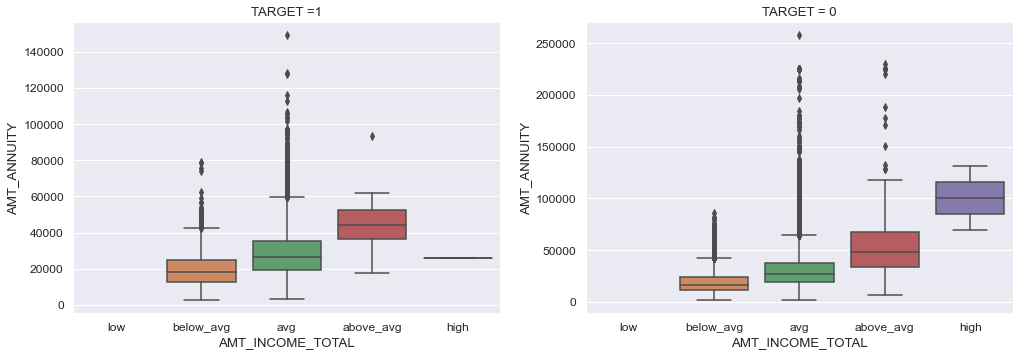

In [60]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(df_1['AMT_INCOME_TOTAL'],df_1['AMT_ANNUITY'])
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.boxplot(df_0['AMT_INCOME_TOTAL'],df_0['AMT_ANNUITY'])
plt.title('TARGET = 0')

### observation
- mean amt_income_total vs amt_annuity of non defaulters is comparitively high than that of defaulters 

Text(0.5, 1.0, 'TARGET = 0')

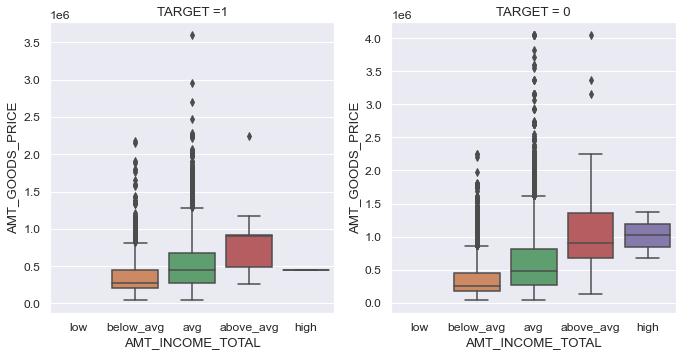

In [61]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(df_1['AMT_INCOME_TOTAL'],df_1['AMT_GOODS_PRICE'])
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.boxplot(df_0['AMT_INCOME_TOTAL'],df_0['AMT_GOODS_PRICE'])
plt.title('TARGET = 0')

### observation
- mean amt_annuity vs amt_goods_price of non defaulters is comparitively high than that of defaulters 

Text(0.5, 1.0, 'TARGET = 0')

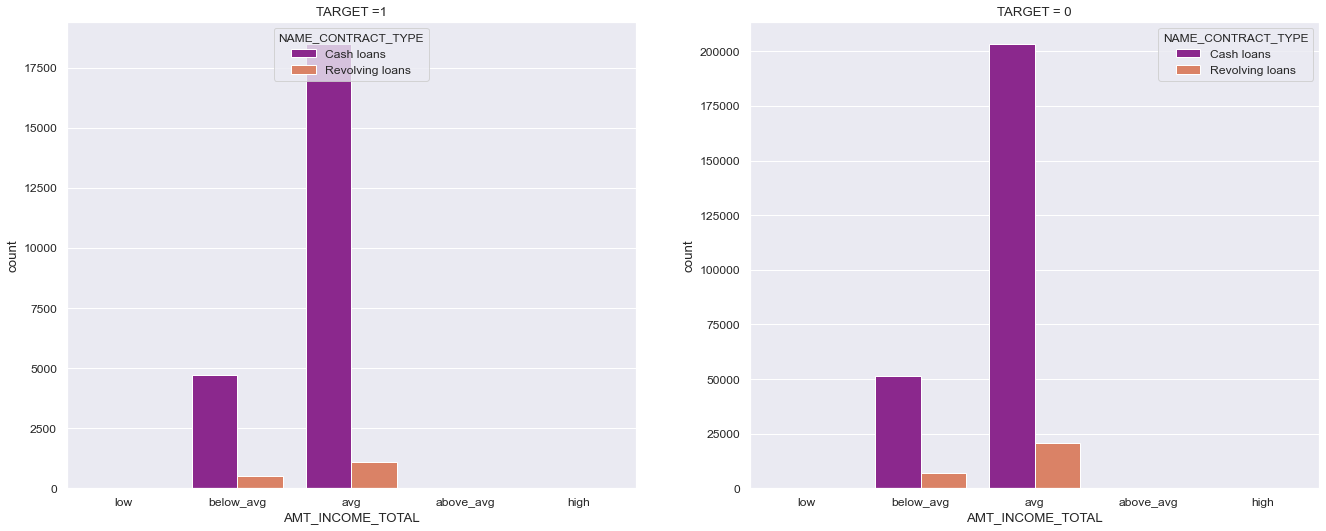

In [62]:
#category-category
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='AMT_INCOME_TOTAL',hue='NAME_CONTRACT_TYPE',data=df_1,palette='plasma')
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.countplot(x='AMT_INCOME_TOTAL',hue='NAME_CONTRACT_TYPE',data=df_0,palette='plasma')
plt.title('TARGET = 0')

## observation
- the percentage of cash loans is much higher than revolving loans

Text(0.5, 1.0, 'TARGET = 0')

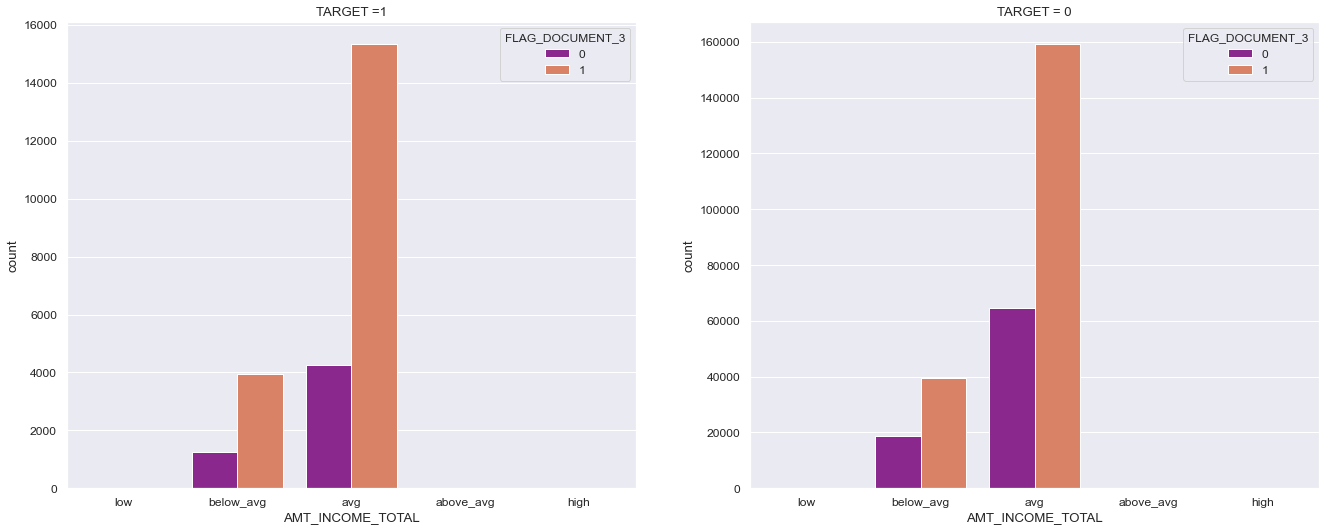

In [63]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='AMT_INCOME_TOTAL',hue='FLAG_DOCUMENT_3',data=df_1,palette='plasma')
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.countplot(x='AMT_INCOME_TOTAL',hue='FLAG_DOCUMENT_3',data=df_0,palette='plasma')
plt.title('TARGET = 0')

## observation
- the average income total of target0 is higher than target1

Text(0.5, 1.0, 'TARGET = 0')

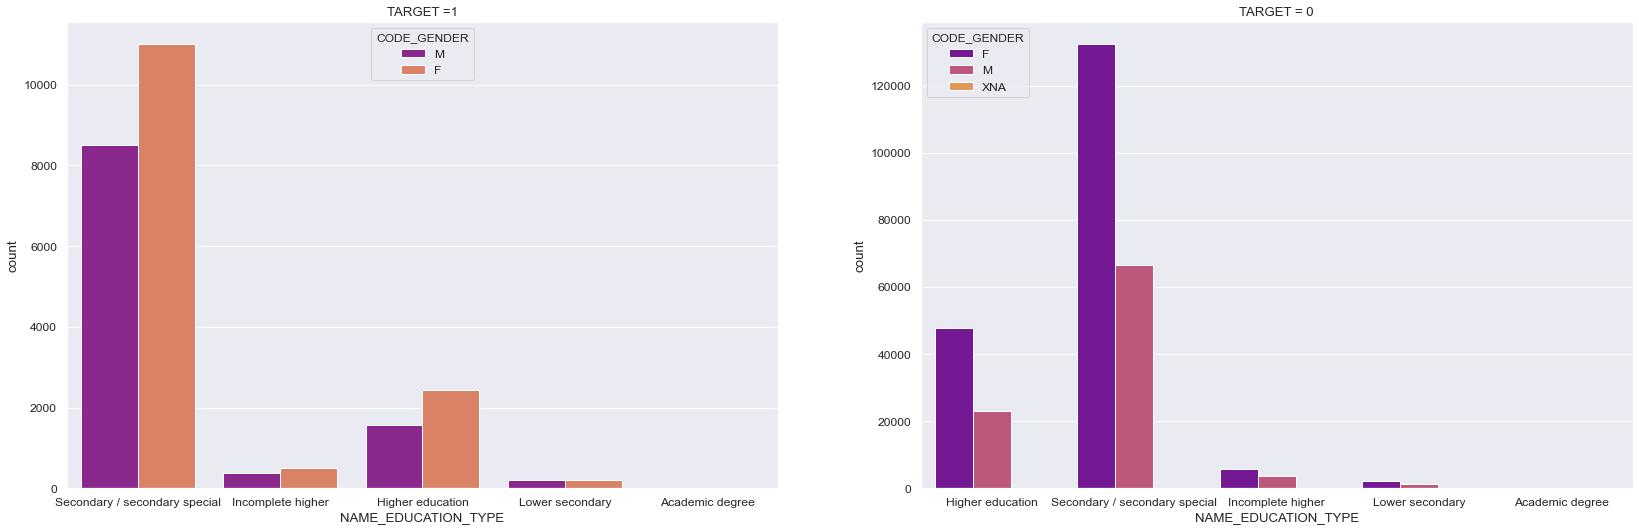

In [64]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
sns.countplot(x='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=df_1,palette='plasma')
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.countplot(x='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=df_0,palette='plasma')
plt.title('TARGET = 0')

## observation 
-the level of education in target0 is much higher than target 1 which clearly states that education qualification plays a major role.

Text(0.5, 1.0, 'TARGET = 0')

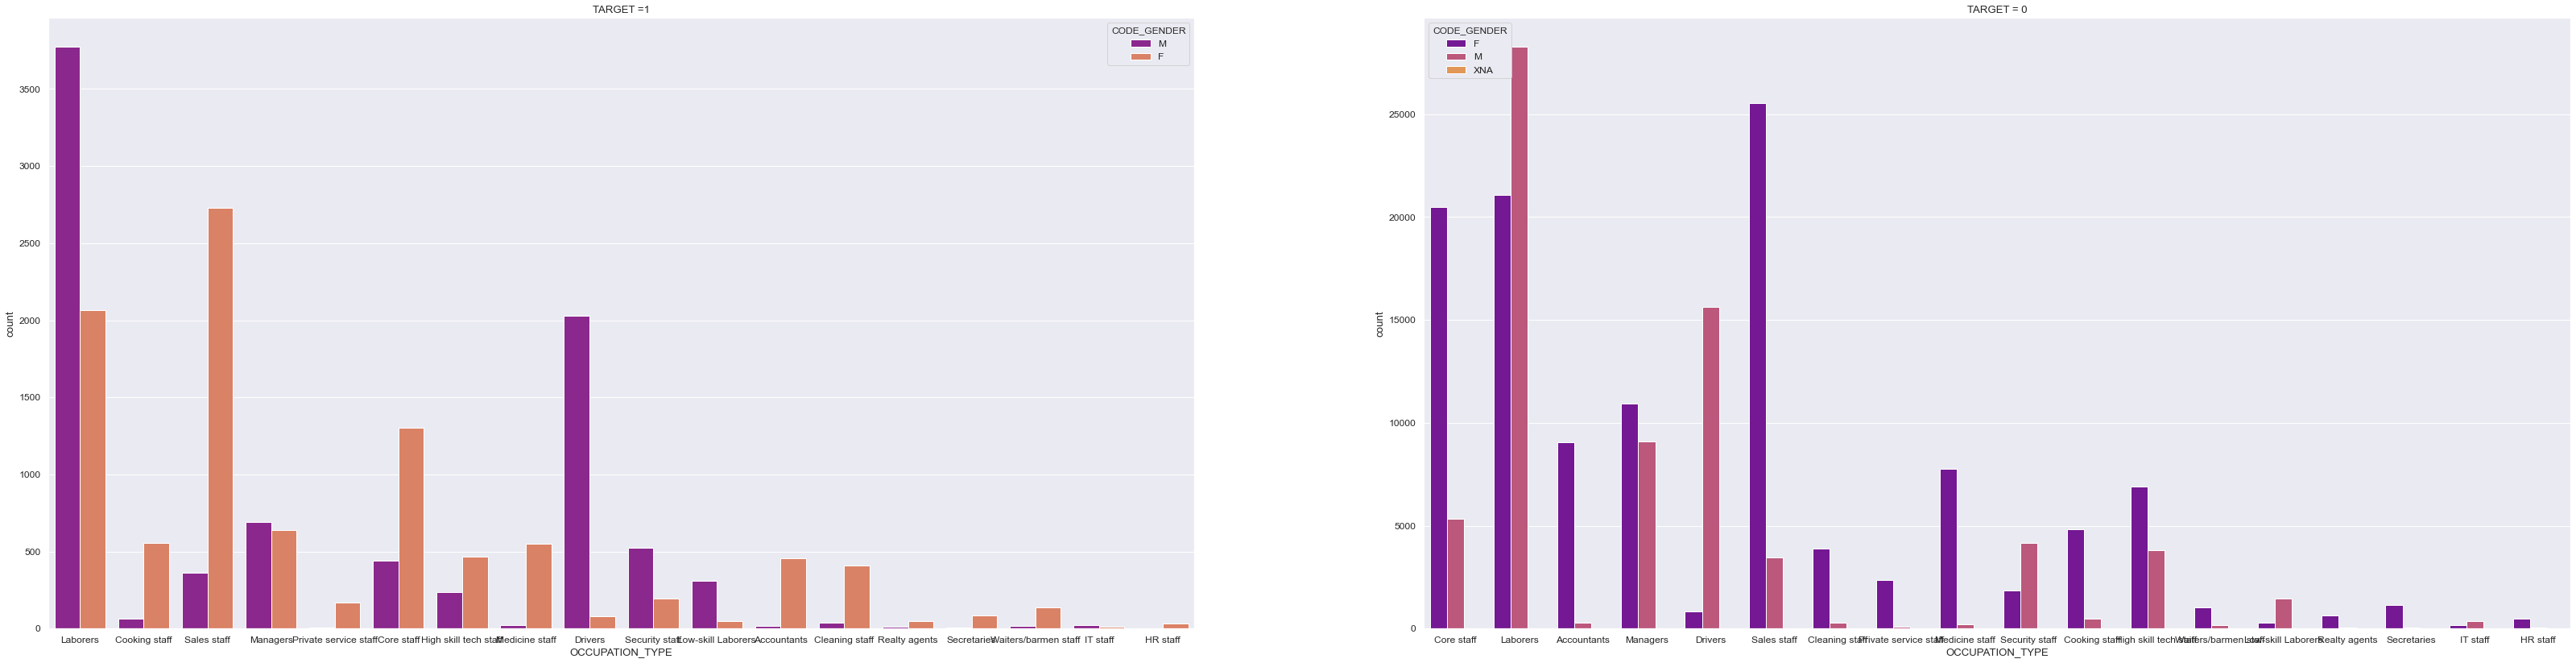

In [65]:
plt.figure(figsize=(50,13))

plt.subplot(1,2,1)
sns.countplot(x='OCCUPATION_TYPE',hue='CODE_GENDER',data=df_1,palette='plasma')
plt.title('TARGET =1')

plt.subplot(1,2,2)
sns.countplot(x='OCCUPATION_TYPE',hue='CODE_GENDER',data=df_0,palette='plasma')
plt.title('TARGET = 0')

## observation
- highest percentage of the group is present in laborers and second comes the sales staff

In [101]:
age_data = app_data.loc[:,['TARGET', 'DAYS_BIRTH']]
age_data.loc[:,'YEARS_BIRTH'] = app_data.loc[:,'DAYS_BIRTH']/ 365
# Bin the age data
age_data.loc[:,'YEARS_BINNED'] = pd.cut(age_data.loc[:,'YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [102]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


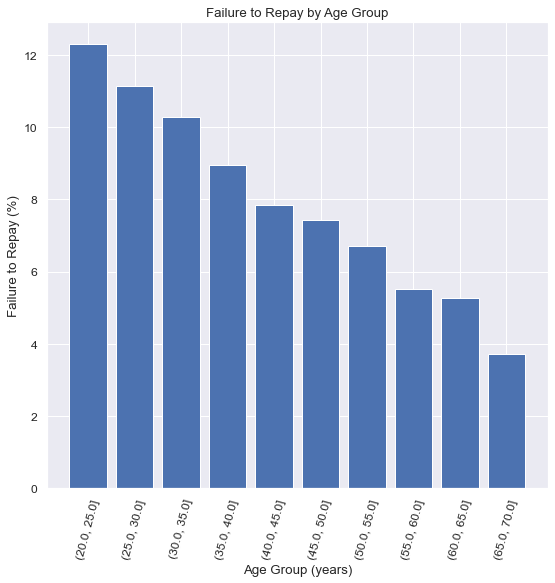

In [103]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

### observation
- Maximum Failure to Repay is in Age Group 20-25

In [66]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,atmost_two_children,avg,406597,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,atmost_two_children,avg,1293502,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,atmost_two_children,below_avg,135000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,atmost_two_children,avg,312682,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,atmost_two_children,avg,513000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
prev_app.shape

(1670214, 37)

In [69]:
new_df=pd.merge(prev_app, pd.DataFrame(app_data[['SK_ID_CURR','TARGET']]), how='inner', on='SK_ID_CURR')

In [70]:
new_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,0
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,0


In [71]:
new_df.shape

(1413701, 38)

In [72]:
new_df.NAME_CONTRACT_STATUS.value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

In [104]:
approved=new_df[new_df.NAME_CONTRACT_STATUS=='Approved']
refused=new_df[new_df.NAME_CONTRACT_STATUS=='Refused']
canceled=new_df[new_df.NAME_CONTRACT_STATUS=='Canceled']
unused=new_df[new_df.NAME_CONTRACT_STATUS=='Unused Offer']

In [106]:
percentage_approved=(len(approved)*100)/len(new_df)
percentage_refused=(len(refused)*100)/len(new_df)
percentage_canceled=(len(canceled)*100)/len(new_df)
percentage_unused=(len(unused)*100)/len(new_df)

print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,2),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,2),"%")
print("The Percentage of people whose loans have been Canceled is:",round(percentage_canceled,2),"%")
print("The Percentage of people whose loans have been Unused is:",round(percentage_unused,2),"%")

The Percentage of people whose loans have been Approved is: 62.68 %
The Percentage of people whose loans have been Refused is: 17.36 %
The Percentage of people whose loans have been Canceled is: 18.35 %
The Percentage of people whose loans have been Unused is: 0.0 %


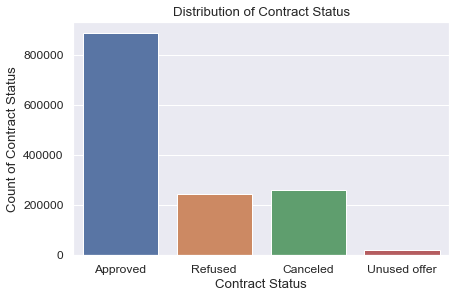

In [73]:
sns.countplot(new_df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

,RATE_INTEREST_PRIVILEGED,RATE_INTEREST_PRIMARY,RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT,NAME_TYPE_SUITE,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,DAYS_LAST_DUE_1ST_VERSION,NFLAG_INSURED_ON_APPROVAL,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,PRODUCT_COMBINATION,AMT_CREDIT
Total,1408910.000000,1408910.000000,749540.000000,749540.000000,694672.000000,561106.000000,561106.000000,561106.000000,561106.000000,561106.000000,561106.000000,319525.000000,307218.000000,307213.000000,313.000000,1.000000
Percent,99.661102,99.661102,53.019698,53.019698,49.138538,39.690571,39.690571,39.690571,39.690571,39.690571,39.690571,22.602021,21.731469,21.731116,0.022140,0.000071


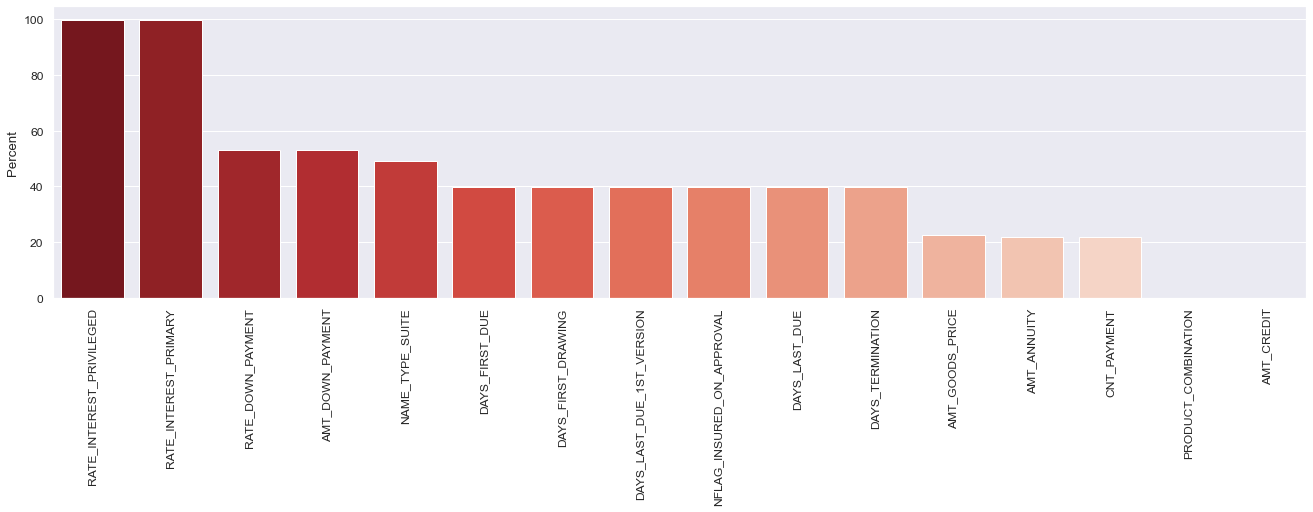

In [74]:
missing = missing_percentage(new_df)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

In [75]:
new_df=new_df.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','RATE_DOWN_PAYMENT','AMT_DOWN_PAYMENT'],axis=1)

,NAME_TYPE_SUITE,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,PRODUCT_COMBINATION,AMT_CREDIT
Total,694672.000000,561106.000000,561106.000000,561106.000000,561106.000000,561106.000000,561106.000000,319525.000000,307218.000000,307213.000000,313.000000,1.000000
Percent,49.138538,39.690571,39.690571,39.690571,39.690571,39.690571,39.690571,22.602021,21.731469,21.731116,0.022140,0.000071


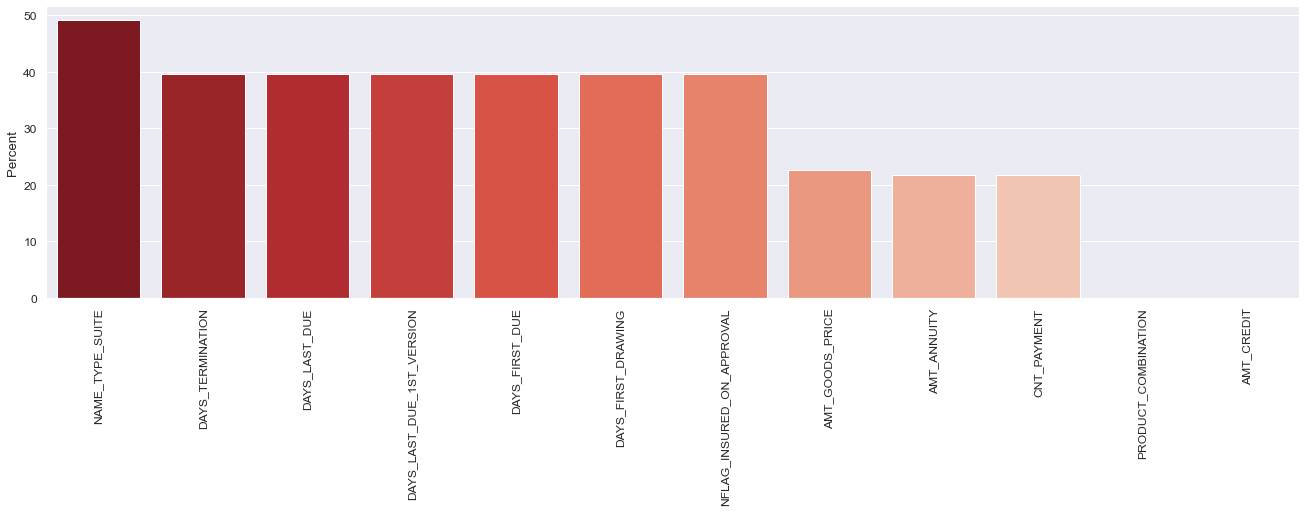

In [76]:
missing = missing_percentage(new_df)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

In [77]:
approved=new_df[new_df.NAME_CONTRACT_STATUS=='Approved']
refused=new_df[new_df.NAME_CONTRACT_STATUS=='Refused']
canceled=new_df[new_df.NAME_CONTRACT_STATUS=='Canceled']
unused=new_df[new_df.NAME_CONTRACT_STATUS=='Unused Offer']

In [78]:
percentage_approved=(len(approved)*100)/len(new_df)
percentage_refused=(len(refused)*100)/len(new_df)
percentage_canceled=(len(canceled)*100)/len(new_df)
percentage_unused=(len(unused)*100)/len(new_df)

print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,2),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,2),"%")
print("The Percentage of people whose loans have been Canceled is:",round(percentage_canceled,2),"%")
print("The Percentage of people whose loans have been Unused is:",round(percentage_unused,2),"%")

The Percentage of people whose loans have been Approved is: 62.68 %
The Percentage of people whose loans have been Refused is: 17.36 %
The Percentage of people whose loans have been Canceled is: 18.35 %
The Percentage of people whose loans have been Unused is: 0.0 %


In [79]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   SK_ID_CURR                   1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413701 non-null  object 
 3   AMT_ANNUITY                  1106483 non-null  float64
 4   AMT_APPLICATION              1413701 non-null  float64
 5   AMT_CREDIT                   1413700 non-null  float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1413701 non-null  object 
 12  NAME_CONTRACT_STATUS         1413701 non-n

In [80]:
def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

In [81]:
new_df.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

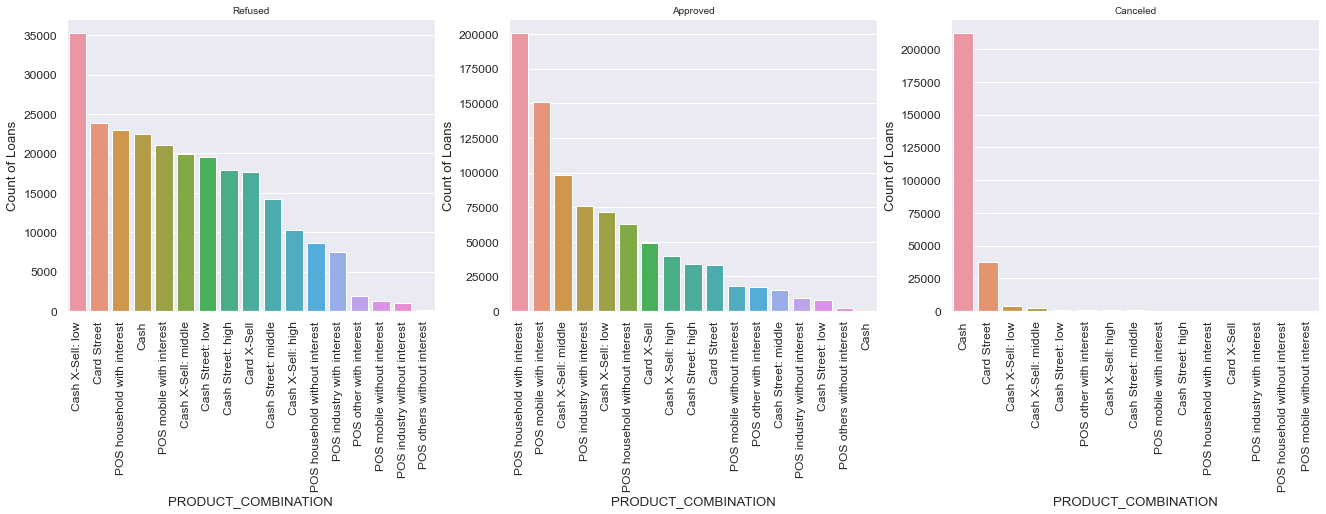

In [82]:
plot_charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)

### observation
- We observe most number of loans were approved for POS household with interest.
- Most number of refused loans were of Cash X-Sell: Low Product combination
- Most Canceled loans were Cash loans

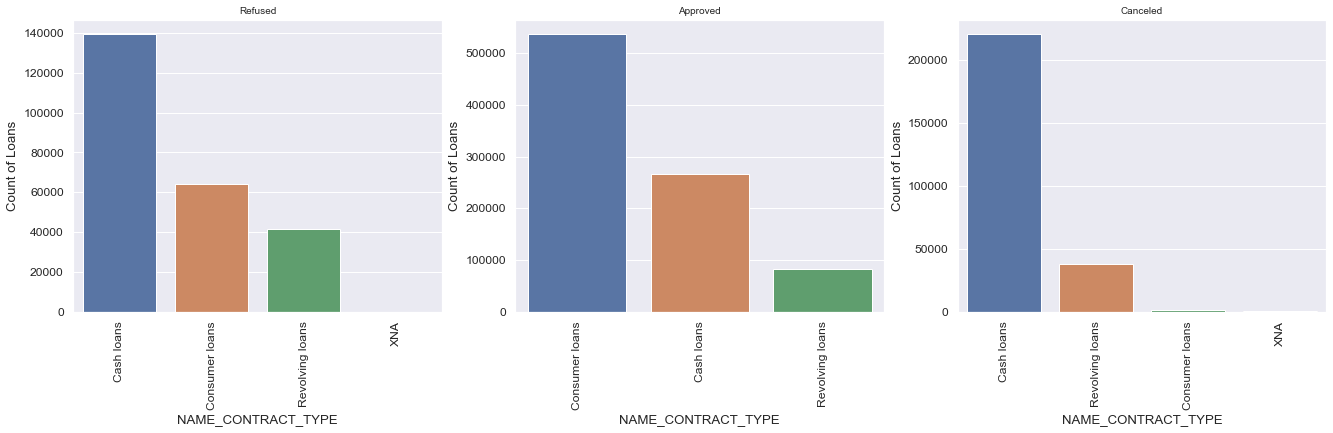

In [83]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=True,horizontal_layout=True)

### observation
- We observe most number of loans were approved for consumer loans.
- Most number of refused loans were of cash loans
- Most Canceled loans were Cash loans

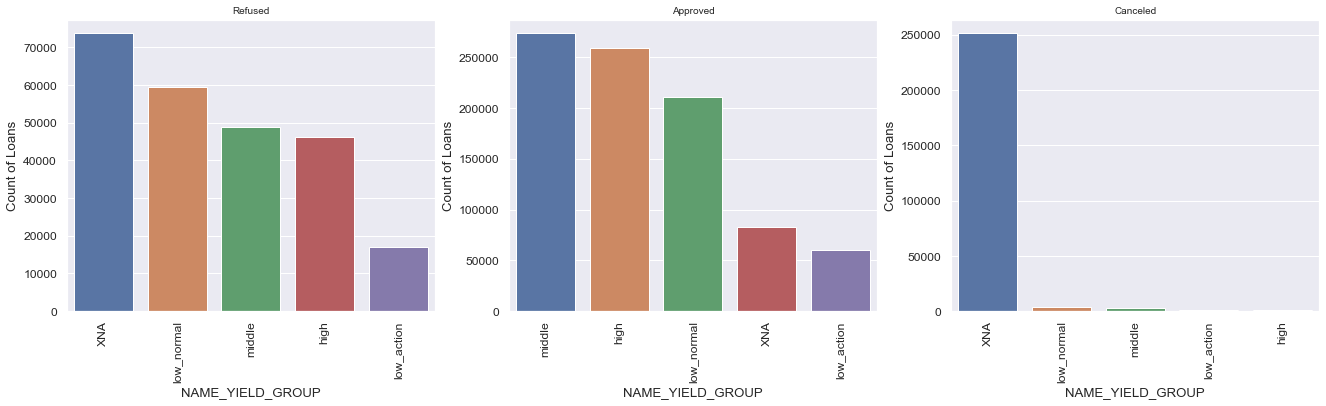

In [84]:
plot_charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)

### observation
- We observe most number of loans were approved for middle category of name_yield_group.


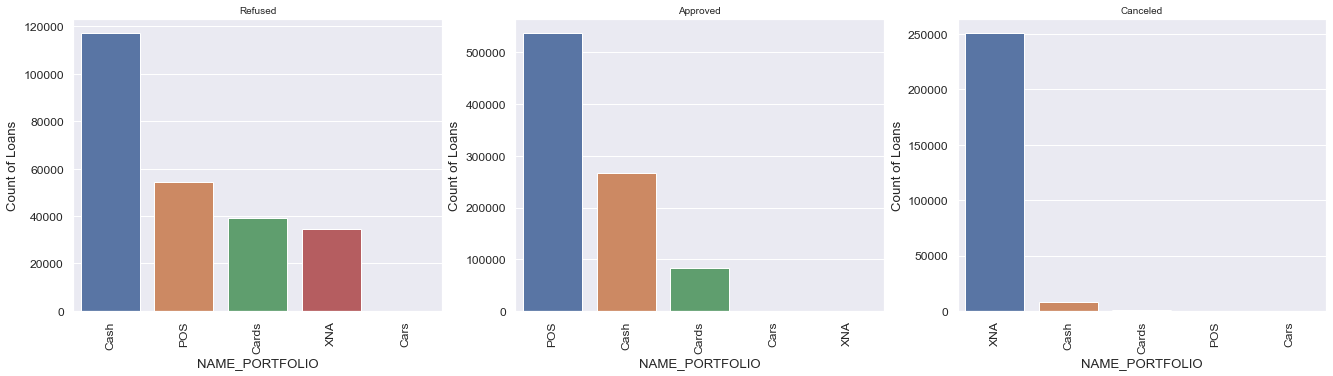

In [85]:
plot_charts('NAME_PORTFOLIO', label_rotation=True,horizontal_layout=True)


### observation
- Most approved loans were POS
- Most refused loans were Cash

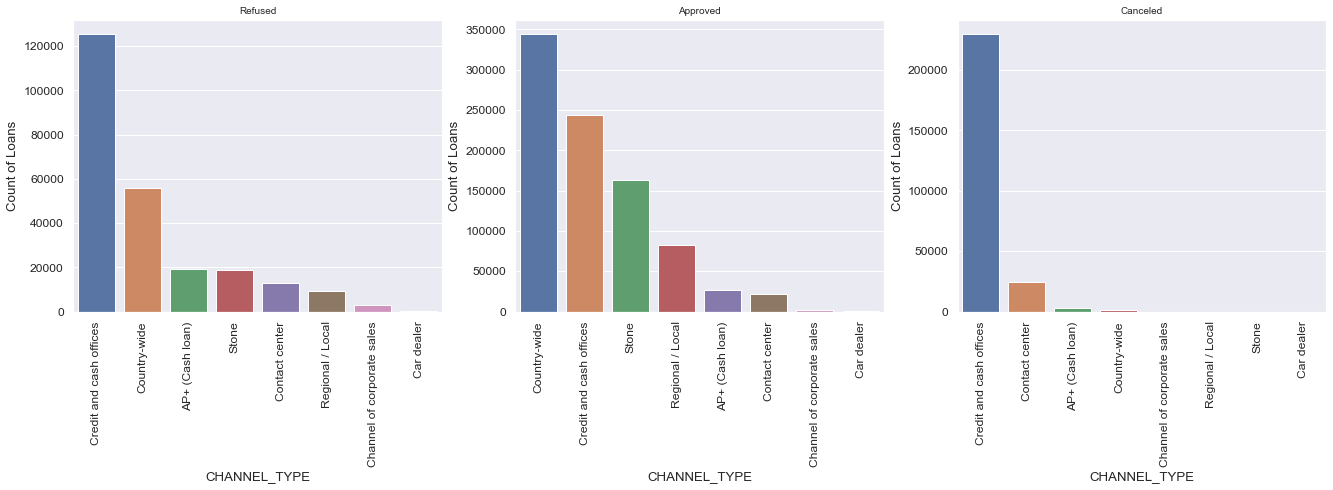

In [86]:
plot_charts('CHANNEL_TYPE', label_rotation=True,horizontal_layout=True)

### observations
- most of the approved loans were of country-wide


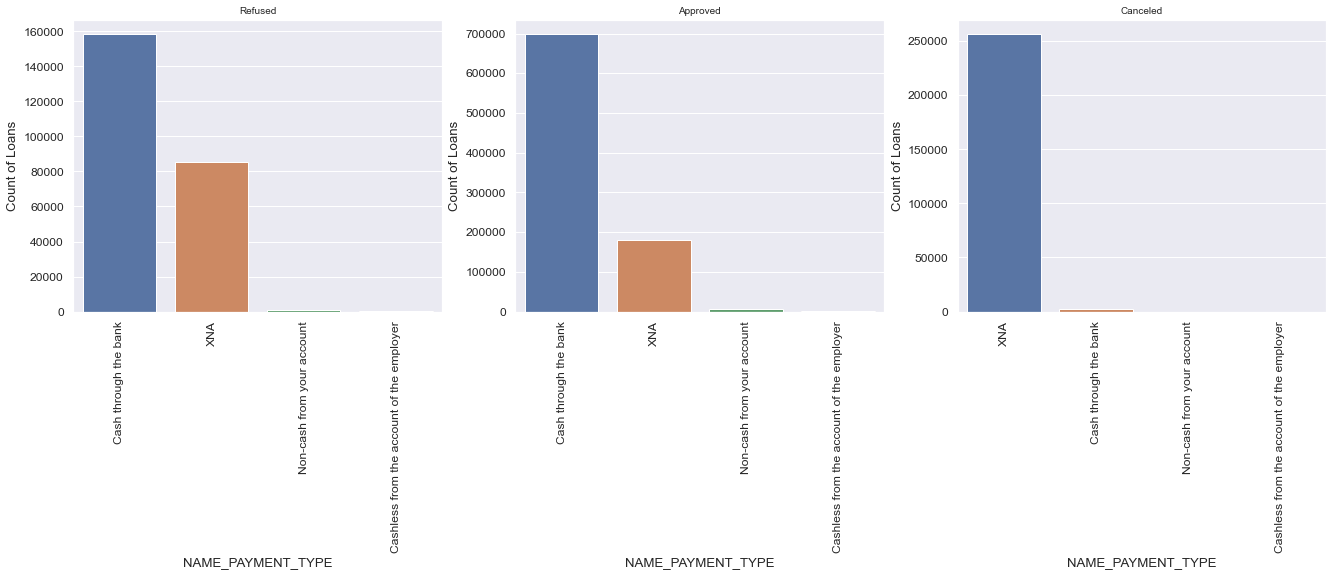

In [87]:
plot_charts('NAME_PAYMENT_TYPE', label_rotation=True,horizontal_layout=True)


### observations
- most of the approved loans were of cash payment method
- most of the refused loans were of cash payment method


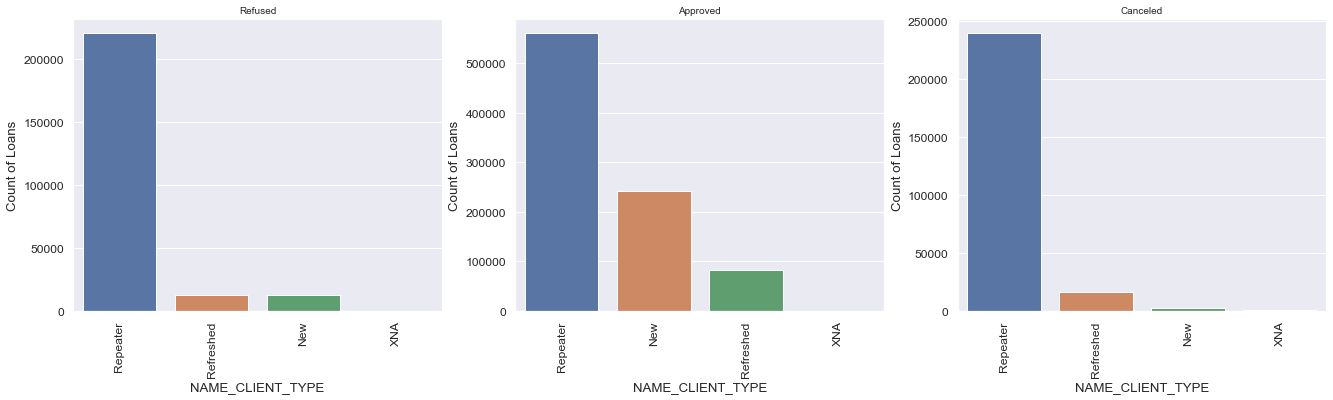

In [88]:
plot_charts('NAME_CLIENT_TYPE', label_rotation=True,horizontal_layout=True)

# correlation for approved dataframe

In [89]:
corr1=approved.corr()
corr1=corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))
corr1_df=corr1.unstack().reset_index()
corr1_df.columns=['Var1','Var2','Correlation']
corr1_df.dropna(subset=['Correlation'],inplace=True)
corr1_df['Correlation_abs']=corr1_df['Correlation'].abs()
corr1_df.sort_values("Correlation_abs",ascending=False,inplace=True)
corr1_df.head(5).style.background_gradient(
    cmap='summer_r')

,Var1,Var2,Correlation,Correlation_abs
93,AMT_GOODS_PRICE,AMT_APPLICATION,1.000000,1.000000
94,AMT_GOODS_PRICE,AMT_CREDIT,0.993331,0.993331
75,AMT_CREDIT,AMT_APPLICATION,0.961757,0.961757
284,DAYS_TERMINATION,DAYS_LAST_DUE,0.927741,0.927741
92,AMT_GOODS_PRICE,AMT_ANNUITY,0.831252,0.831252


# correlation for refused dataframe

In [90]:
corr1=refused.corr()
corr1=corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))
corr1_df=corr1.unstack().reset_index()
corr1_df.columns=['Var1','Var2','Correlation']
corr1_df.dropna(subset=['Correlation'],inplace=True)
corr1_df['Correlation_abs']=corr1_df['Correlation'].abs()
corr1_df.sort_values("Correlation_abs",ascending=False,inplace=True)
corr1_df.head(5).style.background_gradient(
    cmap='summer_r')

,Var1,Var2,Correlation,Correlation_abs
93,AMT_GOODS_PRICE,AMT_APPLICATION,0.999666,0.999666
94,AMT_GOODS_PRICE,AMT_CREDIT,0.991842,0.991842
75,AMT_CREDIT,AMT_APPLICATION,0.983684,0.983684
92,AMT_GOODS_PRICE,AMT_ANNUITY,0.825296,0.825296
74,AMT_CREDIT,AMT_ANNUITY,0.823054,0.823054


In [91]:
approved.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,108400.5,SUNDAY,14,Y,1,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,0
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,450000.0,WEDNESDAY,9,Y,1,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,0
5,2068863,108129,Consumer loans,4830.930,47250.0,23688.0,47250.0,THURSDAY,11,Y,1,XAP,Approved,-619,Cash through the bank,XAP,Family,Repeater,Audio/Video,POS,XNA,Stone,110,Consumer electronics,6.0,high,POS household with interest,365243.0,-588.0,-438.0,-588.0,-580.0,0.0,0


# Credit Loss

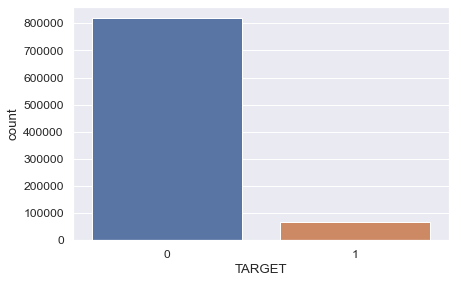

In [92]:
sns.countplot(approved.TARGET)
plt.show()

In [93]:
100*approved.TARGET.value_counts(normalize=True)

0    92.411345
1     7.588655
Name: TARGET, dtype: float64

### observations
- Out of all the approved loans 7.5% of the clients are defaulters.
- This might lead to credit loss

# Interest loss

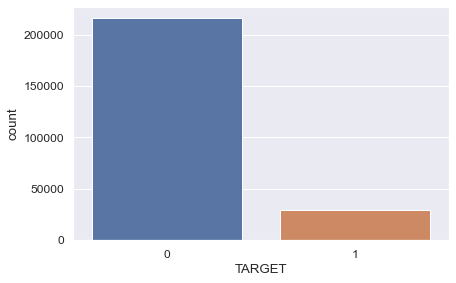

In [94]:
sns.countplot(refused.TARGET)
plt.show()

In [95]:
100*refused.TARGET.value_counts(normalize=True)

0    88.003586
1    11.996414
Name: TARGET, dtype: float64

### observations
- Out of all the refused loans 88% of the clients are non-defaulter.
- This might lead to Interest loss